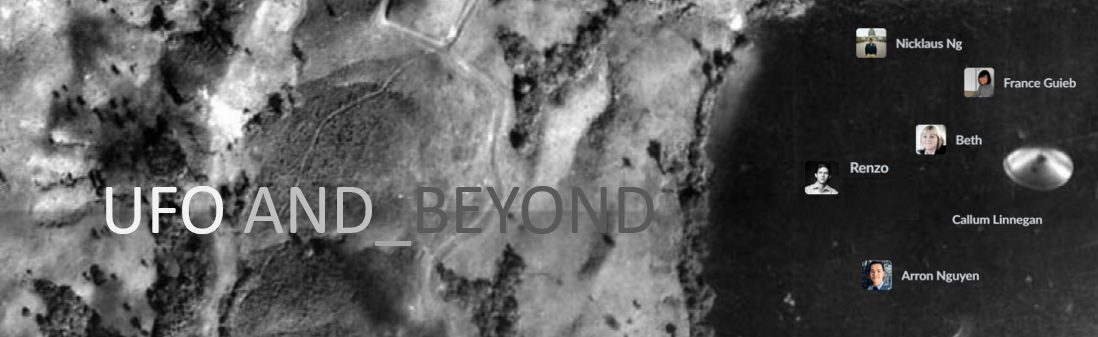

 #  ▌Ufo and_Beyond(2010-2020) - ETL Process and GEO Coding ▌

In [1]:
# Dependencies
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import seaborn as sns
#from plotnine import *
#import maya
import dateutil.parser
import sys
import pandas as pd
from pprint import pprint
from opencage.geocoder import OpenCageGeocode
from opencage.geocoder import InvalidInputError, RateLimitExceededError, UnknownError

# Import API key
from api_keys import key

## DATA Sourcing
 - For the project we sourced data from data world by Timothy Rener (https://data.world/timothyrenner/ufo-sightings).
 
 - The dataset was assembled by scraping the reports from the NUFORC site. This site has collected personal accounts of UFO sightings with data from 1900s to up to current day. These accounted for over 100,000 reports of UFO sightings.
 
- This dataset contained content including the time, location, duration, and other attributes in shape of object observed and a description of the event.

- The origianl data has records from 1959 – 2019, total records 88,096 rows of data.
 
- We’ve decided to keep only 9 years from 2010 – 2019 of most usable data to work with. This was 8830 rows of data which is more manageable.

- We will then scrape the NUFORC site for 2020 to make the record contain 10 years of cleaned data.

###  Read Data

In [2]:
# Dataset
ufo_data= pd.read_csv('data/nuforc_reports_2010_2019.csv')
ufo_data

,summary,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I was driving towards the intersection of fall...,Ottawa,ON,2019,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
3,"The object has flashing lights that are green,...",Kirbyville,TX,2019,2019-04-02T20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
4,Description is the same as Washington DC event...,Tucson,AZ,2019,2019-05-01T11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,super low altitude stealth jet 9/1/11 NC,Franklin County,NC,2011,2011-09-01T09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,NaN,NaN
8826,Light brown sphere found in the background of ...,Wolf Creek,MT,2011,2011-09-01T10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,NaN,NaN
8827,Bun shaped object hovering over parking lot an...,Hamburg,NY,2011,2011-09-01T18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.709100,-78.830100
8828,Bright silent craft with no navigation lights ...,Falmouth,MA,2011,2011-09-01T18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.574282,-70.627218


###  Data Cleanup

In [65]:
# Drop summary column as it is identical to text and made data set diffuclt to work with
ufo_data = ufo_data.drop('summary',1)
ufo_data

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Chester,VA,2019,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,Rocky Hill,CT,2019,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,Ottawa,ON,2019,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
3,Kirbyville,TX,2019,2019-04-02T20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
4,Tucson,AZ,2019,2019-05-01T11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
8825,Franklin County,NC,2011,2011-09-01T09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,NaN,NaN
8826,Wolf Creek,MT,2011,2011-09-01T10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,NaN,NaN
8827,Hamburg,NY,2011,2011-09-01T18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.709100,-78.830100
8828,Falmouth,MA,2011,2011-09-01T18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.574282,-70.627218


In [66]:
#convert into df
ufo_df = pd.DataFrame(ufo_data)
ufo_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Chester,VA,2019,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,Rocky Hill,CT,2019,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,Ottawa,ON,2019,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
3,Kirbyville,TX,2019,2019-04-02T20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
4,Tucson,AZ,2019,2019-05-01T11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
8825,Franklin County,NC,2011,2011-09-01T09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,NaN,NaN
8826,Wolf Creek,MT,2011,2011-09-01T10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,NaN,NaN
8827,Hamburg,NY,2011,2011-09-01T18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.709100,-78.830100
8828,Falmouth,MA,2011,2011-09-01T18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.574282,-70.627218


In [67]:
#splitting date and time into two separate columns
ufo_df[['date','time']] = ufo_df.date_time.str.split("T",expand=True,)
ufo_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582,2019-12-12,18:43:00
1,Rocky Hill,CT,2019,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300,2019-03-22,18:30:00
2,Ottawa,ON,2019,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501,2019-04-17,02:00:00
3,Kirbyville,TX,2019,2019-04-02T20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200,2019-04-02,20:25:00
4,Tucson,AZ,2019,2019-05-01T11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542,2019-05-01,11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,Franklin County,NC,2011,2011-09-01T09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,NaN,NaN,2011-09-01,09:00:00
8826,Wolf Creek,MT,2011,2011-09-01T10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,NaN,NaN,2011-09-01,10:25:00
8827,Hamburg,NY,2011,2011-09-01T18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.709100,-78.830100,2011-09-01,18:00:00
8828,Falmouth,MA,2011,2011-09-01T18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.574282,-70.627218,2011-09-01,18:45:00


In [68]:
# convert to certain columns into type datetime format
ufo_df['date_time'] = pd.to_datetime(ufo_df['date_time'], format='%Y-%m-%dT%H:%M:%S.%f')
ufo_df['date'] = pd.to_datetime(ufo_df['date'], format='%Y-%m-%d')
ufo_df['time'] = pd.to_datetime(ufo_df['time'], format='%H:%M:%S')
ufo_df.dtypes

city                      object
state                     object
year                       int64
date_time         datetime64[ns]
shape                     object
duration                  object
stats                     object
report_link               object
text                      object
posted                    object
city_latitude            float64
city_longitude           float64
date              datetime64[ns]
time              datetime64[ns]
dtype: object

In [69]:
#convert nan values into empty strings
ufo_df = ufo_df.replace(np.nan, '', regex=True)
ufo_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.3432,-77.4086,2019-12-12,1900-01-01 18:43:00
1,Rocky Hill,CT,2019,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.6648,-72.6393,2019-03-22,1900-01-01 18:30:00
2,Ottawa,ON,2019,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.3814,-75.7085,2019-04-17,1900-01-01 02:00:00
3,Kirbyville,TX,2019,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.6772,-94.0052,2019-04-02,1900-01-01 20:25:00
4,Tucson,AZ,2019,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.2599,-110.928,2019-05-01,1900-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,Franklin County,NC,2011,2011-09-01 09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,,,2011-09-01,1900-01-01 09:00:00
8826,Wolf Creek,MT,2011,2011-09-01 10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,,,2011-09-01,1900-01-01 10:25:00
8827,Hamburg,NY,2011,2011-09-01 18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.7091,-78.8301,2011-09-01,1900-01-01 18:00:00
8828,Falmouth,MA,2011,2011-09-01 18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.5743,-70.6272,2011-09-01,1900-01-01 18:45:00


In [70]:
ufo_df.dtypes # identify data types

city                      object
state                     object
year                       int64
date_time         datetime64[ns]
shape                     object
duration                  object
stats                     object
report_link               object
text                      object
posted                    object
city_latitude             object
city_longitude            object
date              datetime64[ns]
time              datetime64[ns]
dtype: object

## Spliting Main Dataframe into two
- As one has geo coordinates (US centric)
- And the other which we are missing geo coordinates (non US locations)

In [71]:
# filter out missing coordinates
# where coordinates is blank
ufo_missing_coordinates = ufo_df.loc[ufo_df['city_latitude'] == ""]
ufo_missing_coordinates

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
6,Caloocan City (Philippines),,2019,2019-06-06 19:00:00,other,19:00 to 19:30,Occurred : 6/6/2019 19:00 (Entered as : 6/6/2...,http://www.nuforc.org/webreports/146/S146694.html,group of lights formation sweeping thru a nigh...,2019-06-07T00:00:00,,,2019-06-06,1900-01-01 19:00:00
13,Leyner,CO,2019,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:22:00
14,Catalina,AZ,2019,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:30:00
18,Marin County,CA,2019,2019-08-01 22:30:00,sphere,3 minutes,Occurred : 8/1/2019 22:30 (Entered as : 8-01-...,http://www.nuforc.org/webreports/148/S148424.html,7 stationary brightly lit objects seen over h...,2019-08-23T00:00:00,,,2019-08-01,1900-01-01 22:30:00
21,West Bowmanstown,PA,2019,2019-06-27 01:00:00,triangle,First 3min seconed 3 min.,Occurred : 6/27/2019 01:00 (Entered as : 06/ ...,http://www.nuforc.org/webreports/148/S148370.html,Spotted it behind my property next to Rt 476 N...,2019-08-23T00:00:00,,,2019-06-27,1900-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,East Sooke,BC,2011,2011-10-27 19:30:00,light,>5 min.,Occurred : 10/27/2011 19:30 (Entered as : 10/...,http://www.nuforc.org/webreports/085/S85034.html,Bright white/blue light moving in fluid manner...,2011-12-12T00:00:00,,,2011-10-27,1900-01-01 19:30:00
8795,Upper Peninsula,MI,2011,2011-10-27 21:00:00,light,5 minutes,Occurred : 10/27/2011 21:00 (Entered as : 10/...,http://www.nuforc.org/webreports/084/S84955.html,"Two brilliant red lights, side-by-side, moved ...",2011-12-12T00:00:00,,,2011-10-27,1900-01-01 21:00:00
8808,Hazelton,KS,2011,2011-08-31 21:52:00,unknown,2min,Occurred : 8/31/2011 21:52 (Entered as : 08/3...,http://www.nuforc.org/webreports/083/S83613.html,bright white light in rural Barber county kans...,2011-10-10T00:00:00,,,2011-08-31,1900-01-01 21:52:00
8825,Franklin County,NC,2011,2011-09-01 09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,,,2011-09-01,1900-01-01 09:00:00


In [73]:
# Convert this into a separate dataframe
ufo_missing_coordinates = pd.DataFrame(ufo_missing_coordinates)
ufo_missing_coordinates.head()

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
6,Caloocan City (Philippines),,2019,2019-06-06 19:00:00,other,19:00 to 19:30,Occurred : 6/6/2019 19:00 (Entered as : 6/6/2...,http://www.nuforc.org/webreports/146/S146694.html,group of lights formation sweeping thru a nigh...,2019-06-07T00:00:00,,,2019-06-06,1900-01-01 19:00:00
13,Leyner,CO,2019,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:22:00
14,Catalina,AZ,2019,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:30:00
18,Marin County,CA,2019,2019-08-01 22:30:00,sphere,3 minutes,Occurred : 8/1/2019 22:30 (Entered as : 8-01-...,http://www.nuforc.org/webreports/148/S148424.html,7 stationary brightly lit objects seen over h...,2019-08-23T00:00:00,,,2019-08-01,1900-01-01 22:30:00
21,West Bowmanstown,PA,2019,2019-06-27 01:00:00,triangle,First 3min seconed 3 min.,Occurred : 6/27/2019 01:00 (Entered as : 06/ ...,http://www.nuforc.org/webreports/148/S148370.html,Spotted it behind my property next to Rt 476 N...,2019-08-23T00:00:00,,,2019-06-27,1900-01-01 01:00:00


In [75]:
# remove all missing coordinates rows from main df so we can merge it again later
# create a separate dataframe that has already have all the required information 
ufo_usa_only = ufo_df[ufo_df.city_latitude != ""]
ufo_usa_only = pd.DataFrame(ufo_usa_only)
ufo_usa_only

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.3432,-77.4086,2019-12-12,1900-01-01 18:43:00
1,Rocky Hill,CT,2019,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.6648,-72.6393,2019-03-22,1900-01-01 18:30:00
2,Ottawa,ON,2019,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.3814,-75.7085,2019-04-17,1900-01-01 02:00:00
3,Kirbyville,TX,2019,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.6772,-94.0052,2019-04-02,1900-01-01 20:25:00
4,Tucson,AZ,2019,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.2599,-110.928,2019-05-01,1900-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,Bremerton,WA,2011,2011-09-01 03:00:00,circle,30 Minutes,Occurred : 9/1/2011 03:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84105.html,I was smoking a cigarette on my front porch wi...,2011-10-10T00:00:00,47.5993,-122.67,2011-09-01,1900-01-01 03:00:00
8824,Friday Harbor,WA,2011,2011-09-01 04:00:00,circle,45 min,Occurred : 9/1/2011 04:00 (Entered as : 9-1-2...,http://www.nuforc.org/webreports/083/S83667.html,Bright light and a deep rumbling sound with ot...,2011-10-10T00:00:00,48.5372,-123.068,2011-09-01,1900-01-01 04:00:00
8827,Hamburg,NY,2011,2011-09-01 18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.7091,-78.8301,2011-09-01,1900-01-01 18:00:00
8828,Falmouth,MA,2011,2011-09-01 18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.5743,-70.6272,2011-09-01,1900-01-01 18:45:00


## Find Missing Geo Coordinates
- A number of locations (1558 rows) in our data set has missing geo coordinates
- However they do have a city name, and we can try to find the geo coordinates for what we can
- This was done using Open Cage Data API https://opencagedata.com/

In [77]:
# Review dataframe with missing coordinates
ufo_missing_coordinates.head()

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
6,Caloocan City (Philippines),,2019,2019-06-06 19:00:00,other,19:00 to 19:30,Occurred : 6/6/2019 19:00 (Entered as : 6/6/2...,http://www.nuforc.org/webreports/146/S146694.html,group of lights formation sweeping thru a nigh...,2019-06-07T00:00:00,,,2019-06-06,1900-01-01 19:00:00
13,Leyner,CO,2019,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:22:00
14,Catalina,AZ,2019,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:30:00
18,Marin County,CA,2019,2019-08-01 22:30:00,sphere,3 minutes,Occurred : 8/1/2019 22:30 (Entered as : 8-01-...,http://www.nuforc.org/webreports/148/S148424.html,7 stationary brightly lit objects seen over h...,2019-08-23T00:00:00,,,2019-08-01,1900-01-01 22:30:00
21,West Bowmanstown,PA,2019,2019-06-27 01:00:00,triangle,First 3min seconed 3 min.,Occurred : 6/27/2019 01:00 (Entered as : 06/ ...,http://www.nuforc.org/webreports/148/S148370.html,Spotted it behind my property next to Rt 476 N...,2019-08-23T00:00:00,,,2019-06-27,1900-01-01 01:00:00


In [78]:
# Set the index to city so that we can do our API search based on the index
ufo_missing_coordinates.set_index("city", inplace = True)
ufo_missing_coordinates.head()

,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
city,,,,,,,,,,,,,
Caloocan City (Philippines),,2019,2019-06-06 19:00:00,other,19:00 to 19:30,Occurred : 6/6/2019 19:00 (Entered as : 6/6/2...,http://www.nuforc.org/webreports/146/S146694.html,group of lights formation sweeping thru a nigh...,2019-06-07T00:00:00,,,2019-06-06,1900-01-01 19:00:00
Leyner,CO,2019,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:22:00
Catalina,AZ,2019,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,,,2019-08-09,1900-01-01 20:30:00
Marin County,CA,2019,2019-08-01 22:30:00,sphere,3 minutes,Occurred : 8/1/2019 22:30 (Entered as : 8-01-...,http://www.nuforc.org/webreports/148/S148424.html,7 stationary brightly lit objects seen over h...,2019-08-23T00:00:00,,,2019-08-01,1900-01-01 22:30:00
West Bowmanstown,PA,2019,2019-06-27 01:00:00,triangle,First 3min seconed 3 min.,Occurred : 6/27/2019 01:00 (Entered as : 06/ ...,http://www.nuforc.org/webreports/148/S148370.html,Spotted it behind my property next to Rt 476 N...,2019-08-23T00:00:00,,,2019-06-27,1900-01-01 01:00:00


In [136]:
# Import our API requirements
key = key
geocoder = OpenCageGeocode(key)
addressfile = ufo_missing_coordinates

In [80]:
# run the API to extract Coordinates
#set up a coordiantes list just in case
coordinates = []
for line in ufo_missing_coordinates.index:
    try: 
      address = line.strip()
      results = geocoder.geocode(address, no_annotations='1')

      if results and len(results):
        city  = results[0]['formatted']
        longitude = results[0]['geometry']['lng']
        latitude  = results[0]['geometry']['lat']        
        
        #loop through and find missing coordinates and append it to dataframe 
        ufo_missing_coordinates.loc[line,"city_latitude"] = results[0]['geometry']['lng']
        ufo_missing_coordinates.loc[line,"city_longitude"] = results[0]['geometry']['lat']
        
        #get response 
        response_output = {
            "city": city,
            "city_latitude":latitude,
            "city_longitude":longitude
                    }
        #also append coordinates list
        coordinates.append(response_output)
        
        print(u'%f;%f;%s' % (latitude, longitude, address))
      else:
        #if not found append the field as blank
        sys.stderr.write("not found: %s\n" % address)
        ufo_missing_coordinates.loc[line,"city_latitude"] = ""
        ufo_missing_coordinates.loc[line,"city_longitude"] = ""
    #handling error exceptions
    except (IOError, AttributeError):
        print('Error: File %s does not appear to exist.' % addressfile)
        # Open cage API only allows 2500 API call a day so once limit is hit notify
    except RateLimitExceededError as ex:
      print(ex)
    continue

14.651322;120.972296;Caloocan City (Philippines)
40.049707;-105.102484;Leyner
32.482131;-110.900197;Catalina
38.040914;-122.619964;Marin County
40.800047;-75.664340;West Bowmanstown
43.992421;-102.239981;Wall
43.601077;-86.337943;Shelby Twp
45.766911;11.734347;Bassano del Grappa (Italy)
9.010793;38.761252;Addis Ababa (Ethiopia)
40.995375;-74.012083;River Vale
37.782883;-81.990124;Micco
42.575186;-83.293981;Bloomfield Twp.
30.173419;-95.504686;The Woodlands
28.261679;-81.618408;Champions Gate
35.173930;33.364726;Nicosia
31.927907;-81.096552;Mc Alpin
37.201902;-113.187854;Near Virgin, UT
47.214055;-94.753310;LaPorte
-26.250000;28.400000;Sabdy Springs
39.567551;-84.816067;West College Corner
48.509465;-101.885162;Donnybrook
46.500283;-66.750183;New Brunswick


not found: 


45.148906;-93.963920;Wright
53.407199;-2.991680;Liverpool (UK/England)
48.700887;-121.099227;Diablo Lake
37.211334;-98.703326;Barber
40.749824;-73.797634;Queens
39.108930;-105.756164;Park County
38.833958;-104.825349;Colorado Springs?
41.675927;-74.072643;Ardonia
39.288463;-76.567545;Highlandtown Lake
52.921262;-1.476149;Derby
37.079179;-106.008633;Antonito
-45.000000;-15.000000;Atlantic Ocean (240 miles E of FL)
39.364285;-74.422935;Atlantic City??
42.980070;-75.250997;Clayville
31.807297;-102.241338;Estes
40.026489;-119.569067;Pyramid Lake
34.365169;-77.630529;Topsail Beach
34.490167;-77.431630;North Topsail Beach
32.274591;-90.132031;Pearl
39.658735;-74.168292;Surf City
39.843377;-86.397774;Brownsburg
30.381580;-97.761873;Adirondack
48.082194;17.263614;Dunajska Luzna (Slovakia)
33.567315;-111.523569;Saguaro Lake
38.355862;-104.711211;Pueblo West
47.755883;-122.341043;Shoreline
47.657110;-117.261394;Spokane Valley
-26.304490;-48.848673;Joinville (Brazil)
43.182535;-94.209098;Kossuth


not found: Monnroe


35.584385;-78.799869;Fuquay Varina
43.020445;-71.600257;Goffstown
39.869552;-104.985181;Thornton
44.468583;-109.437631;Wapiti
41.367591;-75.062395;Lords Valley


not found: Deerfield Townsship


48.666670;19.500000;Slovakia (in flight)(Slovakia)
40.065096;-76.672745;Saginaw Township
34.518020;-93.052942;Hot Springs National Park
46.024275;-123.911250;Gearhart
42.036876;-111.396318;Fish Haven
42.041770;-70.672259;Duxbury


not found: 


35.714530;-83.511890;Knoxville & Gatlinburg
38.833958;-104.825349;South Colorado Springs
42.171137;-87.844512;Deerfield
45.601506;-121.184159;The Dalles area
39.452786;-74.724695;May's Landing
43.491160;1.520002;Gibert
-42.857590;147.503810;Seven Mile Beach (Grand Cayman Island)
47.991503;11.644173;Lanzenhaar/Sauerlach (Germany)
44.058173;-121.315310;Bend
44.336405;-111.461205;Harriman State Park
36.766989;-91.915198;Howell
41.356252;-91.128480;Fruitland
52.042980;-0.758961;Milton Keynes
47.283330;11.450000;Wad Rum (Jordan)
47.991503;11.644173;Lanzenhaar/Sauerlach (Germany)
42.855096;-5.485000;Corolla
42.855096;-5.485000;Corolla
60.795556;-146.444167;Port Fidalgo
42.079437;-92.402133;Clutier


not found: Murrell Inlet


40.343200;-86.653450;Madison-Clinton
40.924820;-74.993784;Mount Hermon
52.907574;-1.283182;Nottingham (UK/England)
14.430891;121.019781;Anahola
48.877780;2.180283;Rueil Malmaison (France)
20.994904;-156.656234;Kapalua
41.307135;-111.960199;North Ogden
39.382067;-74.617149;Egg Harbor Township
33.489057;-79.082540;North Litchfield Beach
39.684841;-74.267086;Cedar Run
30.616217;77.041978;Panchkula (India)
30.616217;77.041978;Panchkula (India)
30.428524;-91.087605;Land O'Lakes
50.581526;-102.650190;Cowessess
40.784936;-75.655722;Lehigh Tunnel
41.945877;-71.281223;Point Pleasant Boro
36.816190;-77.472445;Jarratt


not found: Franconia knotch


45.509000;4.580240;Lorette
37.692755;-112.850777;Brian Head
17.118457;-61.844851;Saint John’s
30.334235;-87.135098;Pensacola Beach
43.476297;-74.385558;Lake Pleasant
32.390907;-110.966488;Oro Valley
43.126872;0.351334;Lagrange
33.922792;-116.543069;North Palm Springs
26.838100;80.934600;Lucknow (India)
51.514196;-0.113477;London (UK/England)
35.219464;-75.690343;Hatteras Village
21.607600;-157.908680;Hauula
40.345491;-74.112820;Garden State Parkway
39.382067;-74.617149;Egg Harbor Township
33.157058;-94.969401;Mount Pleasant
26.440359;-82.113705;Sanibel Island
40.893815;-111.901787;West Bountiful
40.671704;-89.654545;Kickapoo
43.256080;-79.872858;Hamilton


not found: Penna Turnpike I-476 S Lehigh Tunnel


21.315603;-158.008804;Ewa Beach
50.349415;-4.705095;Par (UK/England)
43.430238;-94.946379;Superior
33.718780;-117.767780;Pendelton
43.398124;-76.477440;Minetto
41.356252;-91.128480;Fruitland
38.958231;-122.626373;Clearlake,
38.833958;-104.825349;Colorado Springs
17.953018;-76.918238;Daytona
40.180938;-75.429071;Evansburg
41.117597;-73.407897;Norwalk
39.214281;-74.949896;Delmont  Maurice River
30.367420;-89.092816;Gulfport
40.995375;-74.012083;River Vale
51.264018;7.178037;Wuppertal (Germany)
52.055381;-2.715174;Hereford
13.581921;-38.320312;Atlantic Ocean
51.402006;-1.323643;Newbury
62.360107;10.532249;Tynset (Norway)


not found: Westbloomfield


32.280462;-82.138731;Cobbtown
49.490202;20.670185;Rytro (Poland)
49.331121;-123.159479;West Vancouver
36.220590;-104.649434;Colmor
39.269213;-90.204280;Rockbridge
-23.843172;151.256132;Gladstone
42.377536;-96.060719;Woodbury
27.257185;-82.535694;Siesta Key
27.257185;-82.535694;Siesta Key
32.701939;-97.105624;Arlington
47.657110;-117.261394;Spokane Valley
45.633189;-118.184393;Umatilla National Forest
34.199867;-79.274105;South Jordon
33.015121;-96.613048;Murphy
41.454944;-71.539474;South Kingstown
41.454944;-71.539474;South Kingstown
42.277878;-70.866156;Nantasket Beach


not found: 


22.893888;-109.920060;Cabo San Lucas (Mexico)
-8.283895;-35.032098;Cabo
52.040152;0.729950;Sudbury


not found: 


37.201940;-113.270673;La Verkin
47.657110;-117.261394;Spokane Valley
37.003698;-84.161044;Keavy
51.213149;-1.604208;Cobb
35.608362;139.648023;Todoroki (Japan)
40.245664;-74.845997;Yardley
39.869552;-104.985181;Thornton
42.577636;-121.866126;Chiloquin
38.403155;-81.419286;Coco
34.214885;-118.499820;West San Fernando valley
36.575495;-118.563428;Sequoia National Park
59.468192;24.989675;Maardu (Estonia)
42.724476;-83.036042;Washington twp
41.083064;-81.518485;Akron
40.563234;-104.483529;Weld
45.994710;-69.344467;Chesuncook Lake
44.335385;-76.833312;Camden East Rural
59.325117;18.071093;Stockholm
38.460641;-75.221605;Selbyville
48.319146;-118.169462;Lake Roosevelt
50.685073;-3.465806;Topsham


not found: 


34.552661;38.259261;Palmyra
43.409022;24.618012;Pleven (Bulgaria)
38.295747;-121.244392;Herald
38.419250;-82.445154;Huntington
38.801995;-121.369672;Honululu
16.000000;121.750000;Aurora
45.024412;-84.613679;Otsego
39.167040;-86.534288;Bloomington
48.208354;16.372504;Vienna
56.333333;-3.000000;Fife
46.491253;-63.378502;Cavendish
39.913921;-83.163334;Galloway
42.980070;-75.250997;Clayville
41.557328;-87.665474;Homewood
43.430238;-94.946379;Superior
50.949244;4.571163;Kampenhout (Belgium)
51.023348;5.275048;Heusden-Zolder (Belgium)
32.613469;-88.346699;Payneville
32.613469;-88.346699;Payneville
53.410580;-2.977940;Liverpool (Merseyside) (UK/England)
36.718900;-119.682846;South Shirley
20.687175;-156.439042;Wailea
38.146044;-107.741489;Ouray
27.815581;-82.720100;Kenneth City
45.443860;-93.736373;Orrock
45.443860;-93.736373;Orrock
53.407199;-2.991680;Liverpool (UK/England)
43.187871;-90.567457;Blue River
59.468192;24.989675;Maardu (Estonia)
40.995375;-74.012083;River Vale
-1.592290;-79.0015

not found: Minnepolis


39.349339;-123.814182;Pine Grove
32.390907;-110.966488;Oro Valley
43.601077;-86.337943;Shelby Township
41.880326;-8.523255;Viana do Castelo (Portugal)
44.120982;-123.264246;Franklin-Alvadore


not found: Rowve


44.045648;-71.670685;Lincoln nh


not found: 


38.923637;-105.965601;Antero Junction
36.245092;-83.309338;North Brook
22.263820;113.960380;Fripp Islands


not found: 
not found: Oregon Idaho border


37.334614;-99.209110;Wilmore
42.980070;-75.250997;Clayville
42.331551;-83.046640;Detroit
41.866765;-72.449529;Vernon Rockville
42.583089;-83.359380;Orchard Lake
29.324518;-94.770673;Hwy 168
41.335933;-71.905904;Stonington
43.992421;-102.239981;Wall
44.831410;9.417220;Shuksin picnic area
37.307339;-81.328712;Wolfe
28.261679;-81.618408;Champions Gate
-25.540148;-54.585814;Foz do Iguaçu
45.613598;-123.943147;Rockaway Beach
28.086983;-16.735797;Costa Adeje (Tenerife)(Spain)
-23.550651;-46.633382;São Paulo (Brazil)
28.968582;-95.455221;Jones Creek


not found: Wellinton (New Zealand)


41.376708;-81.945649;Olmsted TWP
34.866760;-92.404320;Morgan Maumelle
40.689064;-74.177255;Newark Airport
39.515882;-116.853723;Nevada
17.023867;-61.774412;Baileys Harbour


not found: 


32.678109;-117.099197;National City
40.668836;-111.824656;Holladay
34.146942;-118.247847;Glendale
45.561608;-94.164200;St. Cloud
25.987314;-80.232271;Miramar
41.033677;-79.251428;Mayport
52.402016;-9.630978;Brick
35.915641;-79.020601;Rogerson
31.024442;91.677162;Shamong
33.478071;-80.892496;Edisto
44.596440;-110.547200;Yellowstone National Park
43.486933;-72.491463;West Windsor


not found: Nollensville


24.600000;92.400000;I-76 in between mile marker 318 and 317


not found: Loyisvillet


38.355862;-104.711211;Pueblo West
31.528902;35.094487;Hebron
21.279357;-157.828571;Waikiki
24.487030;-89.536321;Gulf of Mexico
39.080896;-84.321867;Cherry Grove
-34.156362;22.060189;Mosselbay (South Africa)
24.603457;-81.672594;Big Coppitt Key


not found: Jensenbeach


54.973847;-1.613157;Newcastle
26.166689;-80.278757;Sunrise
39.488700;-79.632274;Saint Joe
-21.141956;149.186515;Mackay
32.390907;-110.966488;Oro Valley
42.609748;-72.597975;Greenfield
27.940989;-80.576503;Grant-Valkaria
14.651322;120.972296;Caloocan (Philippines)
31.756274;-96.879161;Mount Calm
45.062900;-93.206097;New Brighton
30.291545;-87.469410;Perdido Key
44.313064;0.682967;Castella
32.787601;-79.940273;Charleston
48.708416;9.003545;Sindelfingen (Germany)
39.167040;-86.534288;Bloomington
39.167040;-86.534288;Bloomington


not found: Heightstown


50.155220;-5.068826;Falmouth (UK/England)
43.430238;-94.946379;Superior
-39.490210;176.917839;Napier (New Zealand)
42.621369;-95.173328;Lakeside
42.869473;-85.644749;Kentwood
-26.205000;28.049722;Johannesburg (South Africa)
45.797391;24.151920;Sibiu (Romania)
40.801123;-92.888810;Rathbun
34.588146;-86.458877;Owens Cross Rds
33.758726;-84.391367;Tabernacle
41.564217;-82.839633;Catawba Island
40.017984;-74.943485;Delran
17.985204;-66.113567;Guayama (Puerto Rico)
-41.323290;147.135823;Raceway (Australia)
12.053533;-61.751805;Saint George
27.400319;-81.016454;Basinger
40.075738;-74.404162;NJ
42.621369;-95.173328;Lakeside
26.569236;-80.044764;Manalapan
60.983045;25.663275;Trio
45.466900;-97.393700;unsure, possibly Des Moines or Grenville
39.694559;-75.051838;Downer
-37.666266;175.150053;Ngaruawahia (New Zealand)
56.118124;-3.936001;Stirling (UK/Scotland)
-21.182105;55.534424;Grand Bassin (Reunion Island)
23.231305;-106.415314;Mazatlan (Mexico)
33.392689;-95.674949;Delta
38.149595;-79.072557

not found: 


51.784520;-2.582955;Nagshead
45.361907;-73.752432;Châteauguay
42.193975;-70.769713;Scituate
26.271192;-80.270604;Coral Springs
43.464618;-72.368905;Cornish
35.853471;-79.571690;Liberty Town
38.004553;-81.350386;Coalfield
38.375813;26.064655;Chios island
41.983873;-114.673186;Jackpot
41.025315;-90.279848;Wataga
-31.965000;141.451111;Broken Hill
32.527158;-94.860968;White Oak
52.288115;6.145923;Diepenveen (Netherlands)
37.700117;-82.267638;Chattaroy
50.725562;-3.526911;Exeter
36.099813;-80.244052;Winston Salem
33.514307;-82.138782;Evans Georgia
47.005211;-88.962910;Santa Monica Beach
35.864210;-97.561990;Flat Top Mountain, Cedar Valley
34.610024;-112.315721;Prescott Valley
36.924821;-3.585624;Valle
41.783729;-71.416296;Roosevelt lake
42.408430;-71.011995;Revere
58.907039;11.362524;Valex


not found: 


36.345515;-120.688505;Picacho Peak
33.844408;-117.777386;Anaheim Hills
51.694643;5.672908;Zeeland Holland area
38.661953;-90.564326;Chesterfield
37.977542;-0.682845;Torrevieja (Spain)
42.747636;-83.389320;Independence Township
53.187108;-107.655226;Meeting Lake
53.479489;-2.245115;Manchester (UK/England)
55.614312;-4.665559;Irvine (UK/Scotland
53.349764;-6.260273;Dublin (Ireland)
41.332812;1.925468;Begues (Catalonia, Spain)
1.472812;103.764265;Johor Bahru (Malaysia)
39.109046;-94.767624;Wyandotte County
37.614711;15.026349;Nicolosi, Sicily
36.008937;-119.962680;Kettleman City
54.905851;-1.382873;Sunderland (UK/England)
38.497135;-122.966664;Santa Nella
40.210940;-75.278230;Llandudno, North Wales (UK/Wales)
29.302922;47.885289;Al Andalus (Kuwait)
31.201439;-97.771758;Fort Hood
-33.019160;27.899857;East London (South Africa)
40.812588;-76.141603;Mahanoy
25.403476;55.525997;Ajman (United Arab Emirates)
35.369361;-117.659855;Randsburg
48.504916;-122.234941;Sedro Woolley
34.418310;-81.81733

not found: Knoxvile


46.747164;-92.225470;Proctor
55.860982;-4.248879;Glasgow (UK/Scotland)
-4.568450;-80.644694;Sullana (Peru)
51.514196;-0.113477;London (UK/England)
10.309555;123.893111;Cebu City (Philippines)
43.389663;-123.312360;Sutherlin and Roseburg
35.204888;-92.447911;Arkansas
60.500021;9.099972;Northwest
42.993804;-86.084640;Robinson Twp.
32.767044;-116.983393;Mount Helix Park
51.514196;-0.113477;London (UK/England)
54.585984;-6.959155;Northern Ireland
52.666667;-1.000000;Leicestershire (UK/England)
56.070121;-3.908735;Stirlingshire (UK/Scotland)
52.583943;-1.982076;Walsall (UK/England)
52.339052;-2.053202;Bromsgrove (UK/England)
53.144768;-1.197337;Mansfield (UK/England)
51.886132;-0.520934;Dunstable (UK/England)
54.560744;-6.009014;Dunmurry (Northern Ireland)
51.083420;10.423447;Germany
61.143352;-149.957378;Lakeridge
41.472853;-71.957796;Mashantucket
11.000000;-69.833333;Falcon
54.826115;-7.462799;Strabane (County Tyrone) (Northern Ireland)
54.973608;-1.622074;Newcastle (UK/England)
51.745424

not found: Limerick/Clare border (Ireland)


52.894379;-1.338633;Boston (UK/England)
54.905851;-1.382873;Sunderland (UK/England)
52.985820;-0.034177;Trinity and Riverside
53.249283;-3.134526;Flint, Flintshire (UK/Wales)
52.970409;-2.685214;Whitchurch (UK/England)
53.550432;-2.809718;Skelmersdale (UK/England)
51.415739;0.568731;Medway
52.080986;5.127684;Utrecht (Netherlands)
59.093604;17.567841;Jarna (Sweden)


not found: Twenty Nine Palms
not found: Valley View Hot Springs near crestoneCO.


56.786111;-4.114052;UK/Scotland
42.098914;-88.271469;East Dundee
26.074611;-97.161197;Pacific Ocean (no state)
17.147269;-61.800020;Coolidge (Antigua)
41.921673;-93.312270;Iowa
26.166689;-80.278757;Sunrise
41.573646;-87.646435;East Hazel Crest
-33.854816;151.216454;Sydney (Australia)
53.794423;-1.751919;Bradford (UK/England)


not found: Desside (UK/Wales)


47.002500;-71.194496;Ste-Brigitte-de-laval
51.514196;-0.113477;London (UK/England)
42.129471;-80.085269;Erie
36.539458;-94.479902;Bethleham


not found: Caviota


45.959245;15.820410;Luka
43.015015;-112.446695;Fort Hall
9.000000;-80.000000;Pens and Panama
19.052067;-70.631632;La Vega (Dominican Republic)
64.145981;-21.942237;Reykjavík (Iceland)
21.282214;-89.663664;Progreso (Mexico)
48.285289;3.204581;Pont sur Yonne (France)
7.122510;125.646090;Angeles City (Philippines)


not found: Walterborow


53.743572;-0.339476;Hull (Hull) (UK/England)
46.579518;-122.911188;Napavine
42.567390;-82.495968;Walpole Island
27.752253;-81.801749;Fort Meade
43.827734;-94.437190;Truman
43.827734;-94.437190;Truman
52.402016;-9.630978;Brick
51.833333;-1.250000;Oxfordshire (UK/England)
53.714988;-6.352418;Drogheda (Ireland)
48.513369;-122.212082;Sedro Wooley
-33.388368;-70.552250;Dorado (Puerto Rico)
56.133484;-5.484932;Kilmartin (UK/Scotland)
30.826044;-82.905139;Haylow


not found: Puyallyp


-32.758333;18.027778;St. Helena Bay (South Africa)
19.000000;-70.666670;Dominican Republic (off coast of)
-34.451392;138.349739;Dublin (South Australia)
-37.200000;144.100000;Yandoit (Near Daylesford, VIC) (Australia)
39.751706;-87.285293;Leatherwood
40.568824;-74.700274;Branchburg
51.454104;-2.577669;Bristol (UK/England)
42.290023;-88.224806;Holiday Hills
9.010793;38.761252;Addis Ababa (Ethiopia)
9.010793;38.761252;Addis Ababa (Ethiopia)
53.759336;-2.699272;Preston
41.454944;-71.539474;South Kingstown
42.294504;-79.099764;Cherry Creek
35.621250;139.688014;Meguro, Tokyo (Japan)
52.215933;19.134422;Poland


not found: Norcoss


32.527158;-94.860968;White Oak
45.531793;-122.391155;Troutdale
39.403715;-76.950257;Eldersburg
57.879695;-4.027887;Dornoch (UK/Scotland)
34.703346;-113.611324;Wikieup
33.415390;-84.809660;Red Bluff - Dribble Creek Subdivision
39.638040;-104.856920;Cherry Creek State Park
39.149275;-76.775249;Jessup
52.477657;-1.923348;Birmingham (UK/England)
40.311376;-75.941640;Kenhorst
-34.424394;150.893850;Wollongong (Australia)
54.162030;-121.458145;McGregor range
-26.366279;152.851448;Pomoma
44.303937;-75.977450;Holiday Island
-43.530955;172.636645;Christchurch (New Zealand)


not found: 


60.097069;10.603886;Knappa
55.953346;-3.188375;Edinburgh (UK/Scotland)
33.339437;69.958335;Afghanistan (Forward Operating Base)
51.514196;-0.113477;London (UK/England)
49.816700;15.474954;Czech Republic
-22.911014;-43.209373;Rio de Janeiro (Brazil)
36.753543;-93.616395;Flat Creek
53.349764;-6.260273;Dublin (Ireland)
53.424494;-2.318415;Sale (Manchester) (UK/England)
43.293890;13.456290;Verdi


not found: Volujntown


55.877573;-4.388876;Renfrew (UK/Scotland)
41.454944;-71.539474;South Kingstown
34.069650;-118.396306;Beverly Hills
2.188013;73.095082;Th Veymandoo (Maldives)
41.913390;-8.563963;Paredes de Coura (Portugal)
36.259713;-86.648088;Old Hickory
-35.112760;173.267731;Kaitaia (New Zealand)
21.315603;-158.008804;Ewa Beach
44.889703;-93.350122;Edina
41.391883;-70.620854;Marthas Vineyard
3.451792;-76.532494;Cali (Colombia)
51.513787;-0.098451;Saint Paul's
41.454944;-71.539474;South Kingstown
51.514196;-0.113477;London (UK/England)
42.422244;-87.857296;Beach Park
46.791856;-64.063017;Northport
44.566272;-63.726959;Hatchet Lake
32.258114;-109.835683;North Phoenix
53.346446;-2.213674;Handforth (UK/England)
53.144768;-1.197337;Mansfield (UK/England)
52.865196;-7.979460;Ireland


not found: 


41.454944;-71.539474;South Kingstown
32.390907;-110.966488;Oro Valley


not found: Cape May Courthouse


35.419490;-105.207784;Los Montoyas
51.398840;-0.098720;Thornton Heath (UK/England)
41.258770;-73.685385;Katonah
18.331340;-64.793750;Cruz Bay (U. S. Virgin Islands)
47.219864;-122.175327;Lake Tapps


not found: Llandudnol (UK/Wales)


52.582368;-1.881039;Streetly (UK/England)
51.671484;-1.277972;Abingdon (UK/England)
1.357107;103.819499;Singapore
31.979364;35.987944;Jafir (Jordan)
36.766989;-91.915198;Howell
41.382894;2.177432;Barcelona (Spain)
19.617024;-155.033510;Keaau
33.076831;-106.219002;Holloman AFB
26.212861;-80.249771;Tamarac


not found: Cape May Courthouse


47.174949;-84.288289;Batchewana Bay
50.463840;-3.514340;Torquay (Devonshire) (UK/England)
38.087186;-75.209995;Assateague Island
40.734205;13.947125;Ischia (Italy)
27.257185;-82.535694;Siesta Key
41.454944;-71.539474;South Kingstown
33.529892;44.277464;Taji (Iraq)
14.500702;120.991549;Paranaque (Philippines)
22.175760;113.551414;Macau (China)
32.770932;-90.412089;Yazoo
32.770932;-90.412089;Yazoo
47.711502;-95.834523;Enerson
44.173300;-94.033845;North Mankato
42.259126;-97.603681;Pierce
21.315603;-158.008804;Ewa Beach


not found: Muskokee


55.764120;-4.176690;East Kilbride (Glasgow) (UK/Scotland)
53.743572;-0.339476;Hull (UK/England)
38.677959;-121.176058;Folsom
30.955159;-95.950723;Madison County
61.066692;-107.991707;Canada
38.046407;-84.497039;Lexington
21.161785;-86.851047;Cancun (Mexico)
38.718040;-104.715997;Highway 85
39.633341;-90.475369;Scott
33.835849;-118.340629;Torrance
39.906217;116.391276;Beijing (China)
34.002581;-118.156586;Commerce
55.953346;-3.188375;Edinburgh (UK/Scotland)
53.745298;-1.649524;Leeds (UK/England)
-24.776109;134.755000;Australia
-33.854816;151.216454;Sydney (Australia)
53.959055;-1.081536;York (UK/England)
52.451240;-1.937937;Halifax (UK/England)
43.345086;-70.502274;Kennebunk Beach
52.977041;-0.023984;Boston, Lincolnshire (UK/England)
38.095475;-122.272470;Mare Island
44.530780;-69.298325;Freedom
39.469707;-0.376335;Valencia (Spain)
51.454104;-2.577669;Bristol (UK/England)
31.026953;-114.839608;San Felipe (Baja California) (Mexico)
1.357107;103.819499;Singapore
26.172307;-80.131989;Oakla

not found: Pounchatola
not found: Machu Piccu (Peru)


34.281816;-118.561271;Porter Ranch
48.972857;2.343561;Montmagny
54.614314;-2.942090;Cumbria (UK/England)
29.999007;-95.162014;Atascocita
41.176314;-73.790755;Westchester
51.783885;-1.485286;Witney, Oxfordshire (UK/England)
29.815783;-97.218600;Cistern
51.067380;-1.319706;Winchester (UK/England)
53.709206;-1.238314;Knottingley (UK/England)
31.131782;-99.334939;Brady
31.131782;-99.334939;Brady
37.123224;-78.492772;Virginia
50.416667;-4.750000;Cornwall (UK/England)
38.692045;-75.401331;Delaware
-33.854816;151.216454;Sydney (Australia)
53.143751;0.342896;Skegness (UK/England)
53.615366;-2.155756;Rochdale
31.131782;-99.334939;Brady
57.313171;25.274855;Wenden


not found: 


52.971087;-1.307171;Ilkeston (Derbyshire) (UK/England)
33.844408;-117.777386;Anaheim Hills
57.790451;-136.319914;Fleming Island
34.098003;-118.329523;Hollywood
44.716333;-89.679693;Knowlton
55.132390;-1.598083;Bedlington (UK/England)
52.644821;-6.227824;Courtown (Ireland)
51.507990;0.283330;South Ockendon (UK/England)
45.150518;-94.683053;Grove City
55.332784;-3.440084;Moffat (UK/Scotland)
51.655388;-0.395742;Watford (Hertfordshire) (UK/England)
25.319631;55.530452;Sharjah (U.A.E.)
51.875497;0.686370;Coggeshall (UK/England)
51.514196;-0.113477;London (UK/England)
51.747940;-3.377790;Merthyr Tydfil (UK/Wales)
55.001251;-115.002136;Alberta
-36.132303;174.218661;Paparoa (New Zealand)
43.256080;-79.872858;Hamilton
43.883997;-121.438517;Sunriver
-33.700872;150.316144;Yosemite
18.379441;-65.957695;Carolina (Puerto Rico)
33.544278;-84.233809;Stockbridge
20.964140;-89.623564;Progresso (Yucatan) (Mexico)


not found: Corn Wale (UK??)


-26.205000;28.049722;Johannesburg (South Africa)


not found: 


44.552011;-69.631712;Waterville
53.450000;-2.733330;St. Helens (Merseyside)(UK/England)
38.017432;12.515992;Trapani (TP) (Italy)
-41.288795;174.777211;Wellington
48.137108;11.575382;Munich (Germany)
5.839134;118.115892;Sandakan (Sabah) (Malaysia)
51.903510;-0.201337;Stevenage (UK/England)
39.647832;-84.527171;Gratis
39.457890;-76.355240;Joppatowne
39.051727;-84.534110;Fort Wright
-38.087134;145.873546;Drouin West (Australia)
53.431042;-1.355187;Rotherham (UK/England)
40.149225;-74.527959;Upper Freehold Township
17.360589;78.474061;Hyderabad (India)
33.768006;66.238514;Afghanistan
47.860518;-96.098834;Red Lake
49.366120;20.258361;Kunia
42.137052;-83.245107;Woodhaven
28.199000;76.618300;Mamria Thethar, Rewari (HR) (India)
50.725562;-3.526911;Exeter (UK/England)
32.258114;-109.835683;N. Phoenix
1.357107;103.819499;Singapore
52.281452;-1.581574;Warwick
30.869679;-81.509541;Cumberland Island National Seashore
25.047582;-107.619101;Palos Verdes
34.171427;-118.910588;Thousand Oaks, CA


not found: 


48.431206;0.091137;Alencon (France)
43.213395;-77.579723;Irondequoit


not found: 


45.164338;-77.095528;Matawatchan
39.952214;-82.214650;Fort Gratiot
38.278160;-81.278724;Pond Gap
47.758794;-116.756858;Hayden Lake
36.750880;-108.160430;Framington
40.178428;-122.235924;Red Bluff
28.039465;-81.949804;Lakeland
53.959055;-1.081536;York
52.678042;-2.451427;Telford (Shropshire) (UK/England)
56.644301;-2.888212;Forfar (UK/Scotland)
51.889690;0.899465;Colchester (UK/England)
39.117058;-74.891004;Reed's Beach


not found: Clarksvile


39.051727;-84.534110;Fort Wright
40.997933;14.179376;Frignano (Italy)
45.625214;-123.039293;Mountaindale
38.934000;-76.896640;Landover


not found: Shicksinny


34.216643;-77.803207;History Channel
34.159595;-106.910703;Lemitar
44.316449;9.323338;Chiavari (Italy)
42.991422;-85.762978;Trinadad
45.000100;-79.832950;Northen Georgian Bay
45.072206;-93.128288;Shoreview
52.451240;-1.937937;South Yorkshire (UK/England)
14.328397;121.031262;Iligan City (Philippines)
36.775361;3.060188;Algiers
53.793910;-1.752060;Bradford (West Yorkshire) (UK/England)
39.526121;-119.812658;Reno
37.884581;-4.776014;Cordoba (Spain)
35.913340;14.443285;Naxxar (Malta)
47.249580;-122.439875;Tacoma Washington
37.983106;-89.016184;Buckner
54.655540;-1.677060;Bishop Auckland (UK/England)
14.587787;121.129553;Saint Louis area
33.935223;-114.029403;Bouse
33.935223;-114.029403;Bouse
49.497200;3.820190;Saint Thomas


not found: Barendracht (Netherlands)
not found: Red Pheasant First Nation


36.970113;-113.305878;Fort Mohave
30.428524;-91.087605;Land O'Lakes
62.721743;27.936075;Kiluea
31.951569;35.923963;Amman (Jordan)
-3.721200;-38.510839;Atlantic Ocean (Brazil)
39.515882;-116.853723;Nevada
52.585724;-2.130095;Wolverhampton (UK/England)
53.541580;-2.114783;Oldham (UK/England)
34.738354;-120.582625;Vandenberg AFB
52.768215;-0.377122;Bourne
36.841420;-2.462814;Almeria (Spain)
38.442364;-105.222495;Canon City
37.242845;-85.189403;Knifley


not found: 


29.507454;-95.094930;League City
45.708101;-73.651516;Terrebonne
28.431757;-82.664536;Aripeka
13.317511;-16.361411;James Island
40.441694;-79.990086;Pittsburgh area
33.713176;-115.400323;Desert Center
52.007104;4.713758;Holland and Grand Haven
-26.205000;28.049722;Johannesburg (South Africa)
34.735720;-77.995260;Burson & Wallace
-17.895596;-68.682724;Kanta
40.008130;-104.952521;Northglenn
36.785136;-121.666642;Prunedale
29.758938;-95.367697;Houston
36.308428;-95.316914;La Pryor
41.531849;-94.008238;De Soto
28.396411;-81.587880;Palm Bear Lake
34.165009;-118.579527;Chalk Hill
34.049728;-118.094229;South San Gabriel
41.520052;-81.556235;Cleveland Heights
43.157981;-79.244100;Saint Catharines
38.993802;-105.057046;Woodland Park
43.157981;-79.244100;Saint Catharines
41.089204;-90.475410;North Henderson
29.443290;-81.186422;Palm Bear
39.978779;-91.211006;Adams County
46.563685;-120.395674;Moxee
48.533940;-58.770773;Port au Port West
33.231278;-97.009114;Cross Roads
36.970113;-113.305878;Fort

not found: Charlivox


47.003671;-67.850190;Caswell
42.697863;23.322179;Sofia (Bulgaria)


not found: Axminister (UK/England)


10.218049;-71.327905;Ciudad Ojeda (Venezuela)
45.520247;-122.674195;Portland City
23.370035;85.325013;Ranchi (India)
46.592742;-112.036277;Helena
42.623613;-80.450178;Port Rowan
41.633368;-87.633102;Riverdale
42.186607;-122.696790;Southern Oregon
47.294448;-101.622665;Hazen
49.782638;22.800783;pks
37.971690;-100.872662;Garden City
30.065664;-95.146068;Alligator Alley
46.730958;-120.699516;Naches
57.105741;12.250295;Varberg (Sweden)
40.659767;-111.996600;Kearns
43.764687;-95.827237;Wilmont
30.065664;-95.146068;Alligator Alley


not found: Dargivil (New Zealand)


39.006499;-76.924974;Daniels Park
25.029422;-77.361956;Unknown
-27.548919;151.979802;anonymous


not found: Dummies Beach (New Zealand)


37.497144;-76.996430;New Kent County


not found: St. Matthew Village (Belize)


51.456659;-0.969651;Reading
51.514196;-0.113477;London (UK/England)
41.232023;-76.999134;South Williamsport
34.779486;-86.916454;Athens-East Limestone
34.867960;-111.761717;Sedona
5.648794;118.025088;Genting (Malaysia)
32.523396;-94.398216;Harrison
34.365169;-77.630529;Topsail Beach
20.854257;-99.847560;Queretaro City (Mexico)
37.604374;-75.688088;Wachapreague
35.226040;-91.251478;Hwy 260
64.153090;-21.994990;Seltjarnarnesi (Iceland)
40.691608;-75.209987;Easton
51.225402;6.776314;Düsseldorf (Germany)
-12.204933;-77.015034;Haleiwa
52.768215;-0.377122;Bourne
34.106490;-84.033520;Sugar Hill
31.265936;34.847616;Omer
51.514196;-0.113477;London (UK/England)
-29.861825;31.009909;Durban (South Africa)
40.848847;-76.694374;Northumberland County
25.774173;-80.193620;Miami
36.982003;-110.110833;Monument Valley
38.760481;-92.561787;Missouri
36.631338;-87.615688;Fort Campbell
43.167948;141.411712;Royce City


not found: Smryna


47.214055;-94.753310;LaPorte
51.132850;-0.988950;Chawton (a village) (Hampshire) (UK/England)
43.760829;-93.204198;Hollandale
51.790913;1.156533;Bedford (UK/England)
-20.728990;139.493152;Mount Isa (Australia)
51.984257;5.910857;Arnhem (Netherlands)
16.900000;-89.900000;Peten (Guatamala)
-33.928992;18.417396;Cape Town (South Africa)
39.382067;-74.617149;Egg Harbor Township
35.208169;-119.409313;Valley Acres
-41.288795;174.777211;Wellington
33.768006;66.238514;Afghanistan
34.540682;69.042545;Kabul (Afghanistan)
42.375097;-71.039217;East Boston
32.143258;-81.377890;Meldrim
37.075992;-97.874938;Bluff City
35.208169;-119.409313;Valley acres
53.892469;-0.312488;Leven (UK/England)
30.173419;-95.504686;The Woodlands
6.832936;79.867410;Mount Lavinia (Sri Lanka)
19.702712;-101.192382;Morelia (Mexico)
19.702712;-101.192382;Morelia (Mexico)
-10.000000;70.000000;Indian Ocean
42.170581;-88.047853;Kildeer
39.051727;-84.534110;Fort Wright
35.815612;-101.910436;Moore
30.044388;31.235726;Cairo (Egypt)


not found: Cherokee Villiage


29.850861;-81.271663;Saint Augustine Beach
33.177523;-111.547893;San Tan Valley
-16.629552;-49.301372;Grahm
31.133333;30.183333;Al Jizah (Egypt)
39.689504;-84.168827;Kettering
29.926040;-94.250446;Fannett
39.625501;-8.665803;Fatima (Portugal)
52.355000;-7.703889;Clonmel (Ireland)
51.026329;0.993650;Dymchurch (UK/England)
50.803683;-1.075614;Portsmouth (UK/England)
34.685290;33.033266;Limassol (Cyprus)
39.728494;-121.837478;Chico
35.444991;139.636768;Yokohama (Japan)
42.697863;23.322179;Sofia (Bulgaria)
46.959982;22.054173;everywhere
39.016843;-94.463047;Raytown
28.210020;-80.799718;Brevard
35.611588;-115.385862;Primm
43.758252;-122.517081;Westfir
1.357107;103.819499;Singapore
23.810651;90.412647;Dhaka (Bangladesh)
53.745298;-1.649524;Leeds (UK/England)
35.876657;-110.619002;Kykotsmovi


not found: Huntsvile


30.379922;-86.330224;Sandestin
26.973524;-80.131002;Loxahatchee
43.157981;-79.244100;Saint Catharines
53.349764;-6.260273;Dublin (Ireland)
-26.250000;28.400000;Westeren Springs
38.887570;-83.614360;Cherry Fork
29.679324;82.530081;Point Mugu
22.500048;-100.000038;Mexico
47.737350;-120.368974;Ardenvoir
52.231958;21.006725;Warsaw (Poland)
45.593861;-76.662254;Portage du Fort
22.232989;-97.861480;Tampico (Mexico)
42.033434;-70.959210;E. Bridgewater
37.335096;-83.131281;Dwarf
39.708392;-84.199940;Berkley Heights
34.445358;35.822512;Tripoli (Lebanon)
40.122054;-75.216566;Whitemarsh
64.445961;-149.680909;Alaska??
57.479012;-4.225739;Inverness
48.151699;17.109306;Bratislava (Slovakia)
19.702712;-101.192382;Morelia (Mexico)
38.245140;-109.880110;Maze District, Canyonlands National Park
41.234991;-95.137493;Griswold
50.963640;-1.296820;Fair Oak (UK/England)
34.886362;-116.993920;Barstow and Needles
51.500000;-0.466670;West Drayton (UK/England)
13.689085;-83.512499;Haulover
53.647599;-3.004175;So

not found: Werisdale


51.458368;-0.971307;Reading (UK/England)
42.175071;-5.686039;Urrieta
43.226806;-78.027155;Holley
50.642982;-115.983421;U. S. Highway 93
33.319419;-112.031296;Ahwatukee
58.999213;24.804659;Rapla (Estonia)
22.790658;-81.818919;Vegas
33.913506;-78.303889;Holden Beach
53.324980;-3.831480;Colwyn Bay/Llandudno(A55 Llandudno jun.)(between) (UK/Wales)


not found: Applachian Mountains


53.990780;-1.537300;Harrogate (UK/England)
38.690052;-90.342615;Vinita Park
-25.537583;152.701918;Maryborough (Queensland) (Australia)
47.857746;-122.221063;Mill Creek
51.879721;-0.835413;Whitchurch (Buckinghamshire) (UK/England)
39.978802;-86.118926;Carmel
42.375991;-89.633167;Cedarville
47.214055;-94.753310;LaPorte
47.425059;9.376588;St. Gallen (Switzerland)
40.098957;-95.213457;Holt
39.879835;-75.344078;Milmont Park
43.167948;141.411712;Royce City
40.875891;-81.402336;North Canton
52.894379;-1.338633;Boston (UK/England)
26.940252;-82.053574;Tamiami Trail
27.446706;-80.325606;Fort Pierce
24.667088;-81.583142;Florida Keys
48.137108;11.575382;Munich
53.522768;-1.133531;Doncaster (UK/England)
36.574844;139.239418;Japan
43.842802;-84.335556;Billings-Lockwood
40.668836;-111.824656;Holladay
39.382067;-74.617149;Egg Harbor Township
22.122856;-101.041370;Punta Mita (Mexico)
56.786111;-4.114052;UK/Scotland
40.049002;-74.562377;Cookstown
52.402145;-1.501994;Coventry (UK/England)
51.347193;-2.9

not found: MilanÃ³wek (Poland)


47.605302;-124.371623;Kalaloch area
40.808886;-96.707775;Lincoln
51.514196;-0.113477;London (UK/England)
43.733562;-69.994350;Bailey Island
50.736449;-2.955420;Uplyme (UK/England)
34.395342;-111.763275;Arizona
53.354390;-2.219345;Wallingford and Cheshire
32.800096;-105.633869;Lincoln National Forest
32.608237;-80.084817;Kiawah Island
45.134108;-67.631123;Big Lake Township
45.276511;3.100730;Laurie
41.482602;-82.686185;Cedar Point
52.950837;-1.847554;Springdfield
39.469707;-0.376335;Valencia (Spain)
31.068661;35.036648;Dimona (Israel)
41.100929;-74.116254;Airmont
28.651718;77.221939;Delhi (India)
57.159654;-2.122648;Ashgrove
-12.460440;130.841047;Darwin (Australia)
51.514196;-0.113477;London (UK/England)
33.376420;-117.251150;Naval weapons base Fallbrook


not found: Terre haute outskirts


37.128281;-119.694314;O'Neals
41.189755;-88.569512;Kinsman
32.915602;-117.143923;Mira Mesa
-33.854816;151.216454;Sydney (Australia)
53.111094;9.142170;Ottersberg (Germany)


not found: Hamriya Town (UAE)


28.621927;77.087476;Janakpuri (New Delhi) (India)
33.471160;-95.214497;Bogata
36.093519;-81.812994;Blue Ridge Pkwy, NC


not found: ((unspecified location))


38.627499;-121.497904;Natomas


not found: Pa'akai Point- Mamalahoha Hwy


38.980666;-76.936919;College Park
50.800000;-110.683333;Buffalo area
50.800000;-110.683333;Buffalo area
51.514196;-0.113477;London (UK/England)
26.172307;-80.131989;Oakland Park
25.346150;55.421063;Sharjah
45.437191;12.334590;Venice


not found: Space (NASA broadcast)


1.557413;110.343986;Kuching (Malaysia)
-41.105016;146.823846;George Town (Australia)
22.893888;-109.920060;Cabo San Lucas (Mexico)
30.275791;-82.160669;Glen St. Mary
38.088660;-88.852287;Ewing
42.544225;-79.166707;Silver Creek
52.160450;-0.703120;UK/England (city unspecified)
36.879088;10.327678;La Marsa (Tunisia)
60.167488;24.942747;Helsinki (Finland)
51.468613;-0.361347;Hounslow (UK/England)
47.657110;-117.261394;Spokane Valley
53.719730;-8.998786;Claremorris, Co. Mayo, Ireland
51.447011;-0.321383;White Swan
55.999196;-3.784376;Falkirk (UK/Scotland)
38.027043;-121.957848;Bay Point
38.277023;-85.737160;Jeffersonville
-43.530955;172.636645;Christchurch (New Zealand)
41.403600;-95.013880;North Atlantic (inflight sighting)
18.341900;-64.930700;Charlotte Amalie (U. S. Virgin Islands)
40.407561;-80.021664;Tonapah
42.658366;-83.149932;Rochester Hills
40.345167;-75.126391;Bucks County
2.859961;10.188326;Ocean
15.949061;-61.697385;Vieux Fort
33.953350;-117.396160;Diamond Bar to Riverside


not found: 


33.307002;-117.473760;Camp Pendleton
54.547420;-3.588534;Whitehaven (UK/England)
49.547984;1.075095;Montville
39.698725;-75.186014;Ewan
33.946379;-84.334269;Dunwoody
26.160363;-80.138934;Wilton Manors
42.277031;-73.956798;South Cairo
51.514196;-0.113477;London (UK/England)
60.554444;-151.258333;North Kenai
53.376160;-3.105010;Wirral (Merseyside)(UK/Wales)
44.172087;-72.650321;Northfield Falls
-27.427236;152.993223;Willmington
35.607603;-95.860270;Morris-Okmulgee
42.717856;-73.833455;Colonie
-25.745937;28.187944;Pretoria (South Africa)
44.227392;-71.747847;Franconia


not found: Bloomsbug


55.652009;12.197145;Hedehusene (Denmark)


not found: Ballderson


38.580461;-121.530234;W. Sacramento
26.011596;-108.827703;Campo Seco
42.443562;-82.906951;Grosse Pointe Woods
38.969300;-77.142696;Glen Echo
52.448890;9.740000;Baiting H
42.277031;-73.956798;South Cairo
30.024202;-90.239343;Dealth Valley
17.977468;-66.297887;Salinas (Puerto Rico)
52.402145;-1.501994;Coventry (UK/England)
52.907574;-1.283182;Nottingham (UK/England)
-35.281868;174.089677;Paihia (New Zealand)
-26.655652;153.094668;Maroochydore
-26.706891;27.836271;Vanderbijlpark (South Africa)
51.132850;-0.988950;Chawton (village)(Hampshire) (UK/England)
34.557772;-115.744441;Amboy
22.500000;-100.494914;San Luis Potosi (Mexico)
27.756767;-81.463983;Florida
52.634582;-1.694844;Tamworth (UK/England)
-24.019665;-54.205317;Pedro
55.740106;-3.974605;Larkhall (UK/Scotland)
42.697863;23.322179;Sofia (Bulgaria)


not found: Shlangen (Germany)


44.142348;-122.916194;Mohawk
-39.490210;176.917839;Napier (New Zealand)
48.468022;35.041771;Dnepropetrovsk (Ukraine)
39.167040;-86.534288;Bloomington
22.279328;114.162813;Hong Kong (China)
53.166667;-0.250000;Lincolnshire (UK/England)
32.523396;-94.398216;Harrison
42.663877;21.164085;Pristina (Kosovo)
-27.603797;152.871955;Redbank
42.154804;-75.452401;North Sanford
52.477657;-1.923348;Birmingham (UK/England)
25.047582;-107.619101;Palos Verdes
50.938361;6.959974;Cologne (Germany)


not found: Kingsford Hieghts


22.311645;114.176789;Kowloon (Hong Kong) (China)
26.627980;-80.449417;Palm Beach
38.760642;-81.645961;Skidmore
28.446057;77.102479;Palm Spring
39.016843;-94.463047;Raytown
30.147146;-85.614649;Bay Harbor
31.795924;35.211981;Jerusalem (Israel)
-41.471812;-72.939621;Puerto Montt (Chile)
-24.776109;134.755000;Australia
44.665601;-65.609665;Clementsport
30.332184;-81.655651;Jacksonville
47.657110;-117.261394;Spokane Valley
-38.149281;144.359827;Geelong (Australia)
29.551722;-95.098527;International Space Station
14.105686;-87.204676;Tegucigalpa (Honduras)
45.355240;-90.295980;Auburn and Westboro
-25.747207;28.113743;Madeira (Pretoria) (South Africa)
39.689504;-84.168827;Kettering
36.785136;-121.666642;Prunedale


not found: Forth Estuary (Edinburgh) (UK/Scotland)


-37.814218;144.963161;Melbourne (Australia)
44.565793;-92.547699;Bay Point Park
47.800287;-116.898973;Rathdrum Prairie
39.469707;-0.376335;Valencia (Spain)
33.913506;-78.303889;Holden Beach
57.506636;-5.003837;Highland
55.860982;-4.248879;Glasgow (UK/Scotland)
45.399176;14.802039;Delnice (Croatia)
41.526200;-75.203508;White Mills
51.347193;-2.977892;Weston
34.570817;-105.993007;New Mexico
52.711744;6.197307;Meppel (Netherlands)
32.352842;-90.877734;Vicksburg
32.759948;-97.793577;Parker
52.806316;-2.116382;Stafford (UK/England)
41.799670;-72.370467;North Coventry
39.978802;-86.118926;Carmel
33.302431;44.378799;Baghdad
33.102095;-82.803749;Warthen
34.895768;-117.017208;Barstow
45.015059;-64.956579;North Kingston
-29.691250;152.933344;Grafton (Australia)
33.586391;-79.012063;Garden City Beach
45.178898;-100.859213;Dewey
42.329439;-88.460571;McHenry City
51.950319;-8.913241;Cooper's Rock
34.164091;-118.657837;Hidden Hills
2.889443;-73.783892;Colombia
3.099175;101.645023;Petaling Jaya (Mala

not found: Miramich


53.349764;-6.260273;Dublin (Ireland)
18.413337;-66.121818;Ft. Buchanan (Puerto Rico)
34.098003;-118.329523;Hollywood
42.607397;25.485662;Bulgaria
27.257185;-82.535694;Siesta Key
39.589006;-74.723772;Magnolia Township
53.146093;-3.759920;Conwy (UK/Wales)
40.472940;-79.817672;Penn Hills
38.278160;-81.278724;Pond Gap
40.081222;-75.189344;Wyndmoor
39.429768;-86.752784;Devore
55.860982;-4.248879;Glasgow (UK/Scotland)
40.844283;-90.616841;Warren
40.844283;-90.616841;Warren
52.684370;-1.827529;Lichfield (UK/England)
52.040152;0.729950;Sudbury
39.101454;-84.512460;Cincinnati
46.563685;-120.395674;Moxee
39.083622;-84.508371;Covington
25.346150;55.421063;Sharjah (United Arab Emirates)
35.104691;-92.523485;Whistling Straits
48.078586;-120.475714;Lake Chelan
40.619670;-111.810210;Cottonwood Heights
44.684179;-83.605534;Barton City


not found: South Negev Desert (Israel)


48.683180;-113.800170;Glacier National Park
7.524453;125.227980;Tawas
39.508328;-95.858599;Circleville
47.305319;-68.151980;Grand Isle
38.537968;-75.058865;South Bethany Beach
44.776511;-0.038749;Ruch
45.600519;-91.200711;Murry
50.713206;-2.437123;Dorchester
43.611856;1.572111;Mons (France)
52.292812;-3.738930;UK/Wales
46.236588;-60.102145;Scotchtown
48.262927;-80.193851;Wolf Creek
44.966741;-70.643463;Rangeley
50.713206;-2.437123;Dorchester
15.783374;-86.791775;La Ceiba (Honduras)
44.336405;-111.461205;Harriman State Park
28.039465;-81.949804;Lakeland
53.138975;8.214602;Oldenburg
39.904457;-98.050879;Lovewell State Park
35.593513;-75.467936;Rodanthe
35.235903;-85.190790;Soddy Daisy
33.772179;-116.495298;Palm Springs
48.856697;2.351462;Paris (France)
-26.624179;153.078574;Twin Shores
47.558108;7.587826;Basel (Switzerland)
39.167040;-86.534288;Bloomington
-25.745937;28.187944;Pretoria (South Africa)
-32.165000;151.584444;Upper Chichester
51.514196;-0.113477;London (UK/England)
43.601077

not found: Bryant Creek, Rippe access


41.892072;9.005498;Campo
34.703346;-113.611324;Wikieup
42.160859;-88.081465;Deer Park
46.563685;-120.395674;Moxee
36.259713;-86.648088;Old Hickory
60.010734;-151.662799;Walatka
40.391656;-80.075790;Scott Township
34.698218;-76.559647;Harkers Island
34.697384;-76.813270;Pine Knoll Shores
34.686551;-76.895218;Indian Beach
40.808886;-96.707775;Lincoln
52.399423;-0.728004;Kettering (UK/England)
35.802918;-97.682934;Cashion
32.903132;-95.982303;Lake Tawakoni
45.391962;-75.754290;Westboro
45.716213;-94.048104;Benton
43.553438;-79.620820;Mississaugua
40.692538;-89.627877;West Peoria
34.108134;-118.290180;Los Feliz
-33.854816;151.216454;Sydney (Australia)


not found: Acusnet


43.398124;-76.477440;Minetto
53.479489;-2.245115;Manchester (UK/England)
38.502622;-81.638598;Sissonville
42.072265;-86.199739;Sister Lakes
37.147370;-76.514670;Windsor Great Park (Berkshire) (UK/England)
49.056780;-122.816659;South Surrey
35.358474;-79.894490;Troy to Montgomery
37.461915;-96.252845;Elk
42.840647;-85.673877;Cutlerville


not found: Clear Creek East Resort


40.939995;-72.823979;Wading River? Franklin Sq
39.199751;-84.240877;Miami Township
47.121089;-122.290702;South Hill


not found: Charubusco


42.839435;-78.746503;West Seneca
49.119696;6.176355;Metz
38.725178;-105.607716;CO
49.325671;-122.998471;Blueridge
45.172892;-93.302390;Coon Rapids
43.601077;-86.337943;Shelby Twp
52.487734;-0.703271;Corby (UK/England)
52.477657;-1.923348;Birmingham (UK/England)
13.784491;121.030223;San Pascual (Philippines)
47.481390;19.146094;Budapest (Hungary)
51.262826;-1.086198;Basingstoke (UK/England)
47.374449;8.541042;Zurich (Switzerland)
40.151774;-75.336569;East Norriton
51.747743;-0.468999;Hertfordshire (UK/England)
10.775844;106.701756;Ho Chi Minh City (Viet Nam)
43.280349;-71.600006;Penacook
52.301890;-0.693731;Wellingborough
55.928573;12.306391;Hillerød (Denmark)
43.326724;-78.388914;Lyndonville
45.945529;-60.851040;Jamesville
52.497550;-2.168890;Dudley, Kingswinford (UK/England)
41.768921;-87.857835;Hodgkins
38.491221;-77.961822;Culpeper County
52.907574;-1.283182;Nottingham (UK/England)
1.305584;103.786552;Rochester Hill
51.922893;4.463179;Rotterdam (Netherlands)
33.401831;-111.878455;So

not found: Cedarbug


42.819090;-78.833718;Lackawanna
31.652972;-97.502794;Moshiem
35.502400;24.121296;NSA Souda Bay (Greece)
52.651022;-7.248495;South Kilkenny (Ireland)
35.584385;-78.799869;Fuquay Varina
32.261738;-83.736436;Unadilla
53.545719;-2.626462;Wigan (UK/England)
41.101725;-80.764524;Austintown
48.631869;-116.944194;Nordman
40.984606;-72.531617;James Creek
53.479489;-2.245115;Manchester
32.913744;-84.142692;Yatesville
39.658735;-74.168292;Surf City
42.160859;-88.081465;Deer Park
30.051549;-94.741250;Wickliff
44.731909;-93.217720;Apple Valley
41.327911;-75.800711;West Pittston
23.810651;90.412647;Dhaka (Bangladesh)
36.098007;-119.560401;Corcoran
18.201116;-67.139112;Mayaguez (Puerto Rico)
29.162482;-81.139781;Hammock Beach
51.874018;-117.260105;Rocky Mountains (Canada)
43.652178;-94.726925;Sherburn
41.603074;-93.655274;Drake
40.740006;-113.681566;Bonneville Salt Flats
51.374125;-104.297854;Punnichy area
41.505161;-81.693445;Cleveland
53.651807;-1.315291;Ackworth (UK/England)
34.106490;-84.033520;S

not found: Commerce Cityy


35.470260;-115.544997;Rose Mountain Pass
35.957392;-75.624062;South Nags Head
45.513823;-121.592151;Mount Hood parkdale
21.315603;-158.008804;Ewa Beach
25.542698;-103.410512;Torreon, Coahuila (Mexico)
41.864325;-84.178871;Dover Township


not found: Prattesville


38.627499;-121.497904;Natomas
37.968812;-121.668008;Knightsen
31.997366;-102.077948;Midland
37.447898;-80.888693;Cashers
52.517037;13.388860;Berlin (Germany)
40.506100;-80.208200;Moon Township
43.236392;76.945728;Almaty (Kazakstan)
27.756767;-81.463983;Florida
10.953460;122.575633;Iloilo (Philippines)
32.163483;63.423602;Delaram (Afghanistan)
53.861171;-2.547112;Lancashire (UK/England)


not found: Ten Lakes scenic area; border


38.249880;-85.635742;Saint Matthew's
39.302635;-96.770934;Riley
32.930400;-95.574960;Emory-Yantis
52.402145;-1.501994;Coventry (UK/England)
25.238865;55.301987;in space
47.004876;-108.346376;Winnett
37.528443;-81.944009;War Eagle


not found: Television program


47.784542;-122.274295;Brier
44.326084;-76.027327;Wellesley Island
40.607774;-95.291649;Northboro
39.901781;-74.741827;Beaverville
41.343953;-122.969655;Albert Lake
43.653482;-79.383935;Toronto (Canada)
37.204110;-119.058170;Dinkey Lakes Wilderness


not found: 


45.415103;-73.677344;Kahnawake
18.255565;-65.972380;Gurabo (Puerto Rico)
1.357107;103.819499;Singapore
43.606776;-72.979288;Rutland City
51.530484;-0.118550;Field Store
41.188130;-103.699765;Kimball
43.126872;0.351334;LaGrange
37.557760;-89.030242;Interstate 40
48.943769;2.034175;Carrieres sous Poissy (France)
21.316428;-158.069566;Kalaeloa
51.933470;0.247960;Henham (near Stansted Airport) (UK/England)
45.917355;-119.342518;Umatilla
18.121562;-65.457464;Vieques (Puerto Rico)
51.171689;-0.164075;Horley (UK/England)
51.332610;-0.267821;Epsom (Surrey) (UK/England)
52.372760;4.893604;Amsterdam (Netherlands)
26.271192;-80.270604;Coral Springs
37.896870;-122.508863;Strawberry
13.951152;-91.301008;Salt Flats
52.544248;0.088066;Saint Petersburg Causeway
26.166689;-80.278757;Sunrise
40.903987;-73.197890;Nissequogue
23.059836;-109.702515;San Jose del Cabo (Mexico)
-38.149281;144.359827;Geelong (Australia)
33.891774;-87.526124;Carbon Hill
55.824029;-5.081406;Isle of Bute (UK/Scotland)
45.393853;-

In [92]:
# reset index of df
ufo_missing_coordinates.reset_index(inplace=True)
ufo_missing_coordinates.head()

,index,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,0,Caloocan City (Philippines),,2019,2019-06-06 19:00:00,other,19:00 to 19:30,Occurred : 6/6/2019 19:00 (Entered as : 6/6/2...,http://www.nuforc.org/webreports/146/S146694.html,group of lights formation sweeping thru a nigh...,2019-06-07T00:00:00,120.972,14.6513,2019-06-06,1900-01-01 19:00:00
1,1,Leyner,CO,2019,2019-08-09 20:22:00,light,20 minutes,Occurred : 8/9/2019 20:22 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148205.html,There where 4 bright lights in a shape of a di...,2019-08-23T00:00:00,-105.102,40.0497,2019-08-09,1900-01-01 20:22:00
2,2,Catalina,AZ,2019,2019-08-09 20:30:00,cigar,40 seconds,Occurred : 8/9/2019 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/148/S148290.html,My wife and I were taking our usual evening st...,2019-08-23T00:00:00,-110.9,32.4821,2019-08-09,1900-01-01 20:30:00
3,3,Marin County,CA,2019,2019-08-01 22:30:00,sphere,3 minutes,Occurred : 8/1/2019 22:30 (Entered as : 8-01-...,http://www.nuforc.org/webreports/148/S148424.html,7 stationary brightly lit objects seen over h...,2019-08-23T00:00:00,-122.62,38.0409,2019-08-01,1900-01-01 22:30:00
4,4,West Bowmanstown,PA,2019,2019-06-27 01:00:00,triangle,First 3min seconed 3 min.,Occurred : 6/27/2019 01:00 (Entered as : 06/ ...,http://www.nuforc.org/webreports/148/S148370.html,Spotted it behind my property next to Rt 476 N...,2019-08-23T00:00:00,-75.6643,40.8,2019-06-27,1900-01-01 01:00:00


In [93]:
# Drop index column 
#ufo_missing_coordinates = ufo_missing_coordinates.drop('index',1)
ufo_missing_coordinates.dtypes

index                      int64
city                      object
state                     object
year                       int64
date_time         datetime64[ns]
shape                     object
duration                  object
stats                     object
report_link               object
text                      object
posted                    object
city_latitude             object
city_longitude            object
date              datetime64[ns]
time              datetime64[ns]
dtype: object

## Joining the two Dataframe back together
- Once we have all the geo coordinates we join the data back together to make a single dataframe

In [91]:
# lets merge US data and international data together into final dataframe
ufo_final_df = pd.concat([ufo_usa_only, ufo_missing_coordinates], axis=0)
ufo_final_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.3432,-77.4086,2019-12-12,1900-01-01 18:43:00
1,Rocky Hill,CT,2019,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.6648,-72.6393,2019-03-22,1900-01-01 18:30:00
2,Ottawa,ON,2019,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.3814,-75.7085,2019-04-17,1900-01-01 02:00:00
3,Kirbyville,TX,2019,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.6772,-94.0052,2019-04-02,1900-01-01 20:25:00
4,Tucson,AZ,2019,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.2599,-110.928,2019-05-01,1900-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,East Sooke,BC,2011,2011-10-27 19:30:00,light,>5 min.,Occurred : 10/27/2011 19:30 (Entered as : 10/...,http://www.nuforc.org/webreports/085/S85034.html,Bright white/blue light moving in fluid manner...,2011-12-12T00:00:00,-123.66,48.3486,2011-10-27,1900-01-01 19:30:00
1573,Upper Peninsula,MI,2011,2011-10-27 21:00:00,light,5 minutes,Occurred : 10/27/2011 21:00 (Entered as : 10/...,http://www.nuforc.org/webreports/084/S84955.html,"Two brilliant red lights, side-by-side, moved ...",2011-12-12T00:00:00,-87.3963,46.5436,2011-10-27,1900-01-01 21:00:00
1574,Hazelton,KS,2011,2011-08-31 21:52:00,unknown,2min,Occurred : 8/31/2011 21:52 (Entered as : 08/3...,http://www.nuforc.org/webreports/083/S83613.html,bright white light in rural Barber county kans...,2011-10-10T00:00:00,-98.3984,37.0903,2011-08-31,1900-01-01 21:52:00
1575,Franklin County,NC,2011,2011-09-01 09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,-95.2165,33.1601,2011-09-01,1900-01-01 09:00:00


In [94]:
# remove any missing city fields
ufo_final_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.3432,-77.4086,2019-12-12,1900-01-01 18:43:00
1,Rocky Hill,CT,2019,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.6648,-72.6393,2019-03-22,1900-01-01 18:30:00
2,Ottawa,ON,2019,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.3814,-75.7085,2019-04-17,1900-01-01 02:00:00
3,Kirbyville,TX,2019,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.6772,-94.0052,2019-04-02,1900-01-01 20:25:00
4,Tucson,AZ,2019,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.2599,-110.928,2019-05-01,1900-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,East Sooke,BC,2011,2011-10-27 19:30:00,light,>5 min.,Occurred : 10/27/2011 19:30 (Entered as : 10/...,http://www.nuforc.org/webreports/085/S85034.html,Bright white/blue light moving in fluid manner...,2011-12-12T00:00:00,-123.66,48.3486,2011-10-27,1900-01-01 19:30:00
1573,Upper Peninsula,MI,2011,2011-10-27 21:00:00,light,5 minutes,Occurred : 10/27/2011 21:00 (Entered as : 10/...,http://www.nuforc.org/webreports/084/S84955.html,"Two brilliant red lights, side-by-side, moved ...",2011-12-12T00:00:00,-87.3963,46.5436,2011-10-27,1900-01-01 21:00:00
1574,Hazelton,KS,2011,2011-08-31 21:52:00,unknown,2min,Occurred : 8/31/2011 21:52 (Entered as : 08/3...,http://www.nuforc.org/webreports/083/S83613.html,bright white light in rural Barber county kans...,2011-10-10T00:00:00,-98.3984,37.0903,2011-08-31,1900-01-01 21:52:00
1575,Franklin County,NC,2011,2011-09-01 09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,-95.2165,33.1601,2011-09-01,1900-01-01 09:00:00


In [95]:
#sort by date_time
ufo_final_df = ufo_final_df.sort_values('date_time')
ufo_final_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
2930,El Cajon,CA,2010,2010-01-01 00:00:00,triangle,6 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/073/S73913.html,On New Years Eve I went outside to hear the ce...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01 00:00:00
4198,Benton,AR,2010,2010-01-01 00:00:00,circle,5 mins.,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/078/S78231.html,4 bright green circles high in the sky going i...,2010-11-21T00:00:00,34.5759,-92.6351,2010-01-01,1900-01-01 00:00:00
2932,El Cajon,CA,2010,2010-01-01 00:00:00,triangle,12 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/1...,http://www.nuforc.org/webreports/073/S73918.html,3 Red objects hovering over El Cajon CA Exit...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01 00:00:00
2931,Park City,KY,2010,2010-01-01 00:00:00,light,2-3 seconds,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73909.html,"Lights orbiting the moon I am 10,and i was wit...",2010-02-14T00:00:00,37.1336,-86.0986,2010-01-01,1900-01-01 00:00:00
2929,Lemon Grove,CA,2010,2010-01-01 00:00:00,light,about 15 minutes,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73916.html,3 Red lights in line pattern above El Cajon/ E...,2010-02-14T00:00:00,32.7316,-117.039,2010-01-01,1900-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,Strathroy,ON,2019,2019-12-22 20:00:00,light,15 minutes,Occurred : 12/22/2019 20:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151881.html,Chain of white lights following each other upw...,2019-12-22T00:00:00,42.9551,-81.6223,2019-12-22,1900-01-01 20:00:00
2761,Fishkill,NY,2019,2019-12-22 20:35:00,disk,1 minute,Occurred : 12/22/2019 20:35 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151810.html,"Disc Shape Hovering, I was driving on 52 heade...",2019-12-22T00:00:00,41.5277,-73.9072,2019-12-22,1900-01-01 20:35:00
2762,Bethlehem,PA,2019,2019-12-22 21:00:00,unknown,Hours,Occurred : 12/22/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151873.html,"Hello, My wife and I been seeing these objects...",2019-12-22T00:00:00,40.635,-75.3714,2019-12-22,1900-01-01 21:00:00
2763,Kennett Square,PA,2019,2019-12-22 22:15:00,triangle,3min,Occurred : 12/22/2019 22:15 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151874.html,Witness to triangle style craft. View was from...,2019-12-22T00:00:00,39.8468,-75.7116,2019-12-22,1900-01-01 22:15:00


In [97]:
#convert all empty rows into not available
# this step is needed to load into Mongo and route on Flask without any errors 
ufo_final_df = ufo_final_df.replace('','not available', regex=True)
ufo_df

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Chester,VA,2019,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.3432,-77.4086,2019-12-12,1900-01-01 18:43:00
1,Rocky Hill,CT,2019,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.6648,-72.6393,2019-03-22,1900-01-01 18:30:00
2,Ottawa,ON,2019,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.3814,-75.7085,2019-04-17,1900-01-01 02:00:00
3,Kirbyville,TX,2019,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.6772,-94.0052,2019-04-02,1900-01-01 20:25:00
4,Tucson,AZ,2019,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.2599,-110.928,2019-05-01,1900-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,Franklin County,NC,2011,2011-09-01 09:00:00,other,i min,Occurred : 9/1/2011 09:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83731.html,super low altitude stealth jet 9/1/11 NC Extre...,2011-10-10T00:00:00,,,2011-09-01,1900-01-01 09:00:00
8826,Wolf Creek,MT,2011,2011-09-01 10:25:00,sphere,short,Occurred : 9/1/2011 10:25 (Entered as : 09/01...,http://www.nuforc.org/webreports/084/S84138.html,Light brown sphere found in the background of ...,2011-10-10T00:00:00,,,2011-09-01,1900-01-01 10:25:00
8827,Hamburg,NY,2011,2011-09-01 18:00:00,cone,20 seconds,Occurred : 9/1/2011 18:00 (Entered as : 9/201...,http://www.nuforc.org/webreports/084/S84293.html,Bun shaped object hovering over parking lot an...,2011-10-10T00:00:00,42.7091,-78.8301,2011-09-01,1900-01-01 18:00:00
8828,Falmouth,MA,2011,2011-09-01 18:45:00,light,3 minutes,Occurred : 9/1/2011 18:45 (Entered as : 09/01...,http://www.nuforc.org/webreports/083/S83636.html,Bright silent craft with no navigation lights ...,2011-10-10T00:00:00,41.5743,-70.6272,2011-09-01,1900-01-01 18:45:00


In [98]:
# save this dataframe as final CSV
ufo_final_df.to_csv("data/UFO_cleaned_2010_2019_v2.csv")

###  Adding 2020 data
- Add in the data that has been scraped by Callum for 2020 only
- Make sure all columns name and the number of columns matches with 2010 -2019 dataframe

In [102]:
#import the csv for 2020
ufo_2020= pd.read_csv('data/ufo2020.csv')
ufo_2020 = pd.DataFrame(ufo_2020)
ufo_2020

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/12/2020 23:37,Hanover,MA,NaN,NaN,MADAR Node 77,1/19/21
1,12/12/2020 21:01,Star Valley,AZ,NaN,NaN,MADAR Node 53,1/19/21
2,12/12/2020 21:00,New York,NY,Light,5 minutes,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20
3,12/12/2020 21:00,West Hempstead,NY,Other,3 minutes,We looked up in the sky and there was a square...,12/23/20
4,12/12/2020 16:50,Tucson,AZ,Light,5 min,Seen at first as a stationary single point of ...,12/23/20
...,...,...,...,...,...,...,...
2853,1/01/2020 0:00,El Centro,CA,Circle,3 minutes,Red orb floats slowly changing direction then ...,1/31/20
2854,1/01/2020 0:00,Lacey,WA,Chevron,NaN,"Blue light coming from craft, shot through the...",1/31/20
2855,1/01/2020 0:00,Lewiston,ME,Light,On going,It left after I came on your site to report it...,2/07/2020
2856,1/01/2020,St. Petersburg,FL,Triangle,3:00,It's too bad I can't tell the full story on he...,2/07/2020


In [105]:
# Mark sure that the column names are labeled the same as our previous dataframe 
#rename the columns to main df
ufo_2020 = ufo_2020.rename(columns={'Date / Time': 'date_time', 'City': 'city', 'State': 'state', 'Shape': 'shape','Duration': 'duration', 'Summary': 'text', 'Posted': 'posted'})
# add missing columns to df
ufo_2020["year"] = 2020
ufo_2020["report_link"] = ""
ufo_2020["city_latitude"] = ""
ufo_2020["city_longitude"] = ""
ufo_2020["stats"] = ""
ufo_2020.head()

,date_time,city,state,shape,duration,text,posted,year,report_link,city_latitude,city_longitude,stats
0,12/12/2020 23:37,Hanover,MA,NaN,NaN,MADAR Node 77,1/19/21,2020,,,,
1,12/12/2020 21:01,Star Valley,AZ,NaN,NaN,MADAR Node 53,1/19/21,2020,,,,
2,12/12/2020 21:00,New York,NY,Light,5 minutes,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,2020,,,,
3,12/12/2020 21:00,West Hempstead,NY,Other,3 minutes,We looked up in the sky and there was a square...,12/23/20,2020,,,,
4,12/12/2020 16:50,Tucson,AZ,Light,5 min,Seen at first as a stationary single point of ...,12/23/20,2020,,,,


In [108]:
# change the order of columns to match main dataframe
ufo_2020 = ufo_2020[['city', 'state', 'year', 'date_time', 'shape','duration','stats','report_link','text','posted','city_latitude','city_longitude']]
ufo_2020.head()

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Hanover,MA,2020,12/12/2020 23:37,NaN,NaN,,,MADAR Node 77,1/19/21,,
1,Star Valley,AZ,2020,12/12/2020 21:01,NaN,NaN,,,MADAR Node 53,1/19/21,,
2,New York,NY,2020,12/12/2020 21:00,Light,5 minutes,,,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,,
3,West Hempstead,NY,2020,12/12/2020 21:00,Other,3 minutes,,,We looked up in the sky and there was a square...,12/23/20,,
4,Tucson,AZ,2020,12/12/2020 16:50,Light,5 min,,,Seen at first as a stationary single point of ...,12/23/20,,


In [117]:
# convert date_time into date time type
# convert to type datetime
ufo_2020['date_time'] = pd.to_datetime(ufo_2020['date_time'])
#ufo_df['date'] = pd.to_datetime(ufo_df['date'], format='%Y-%m-%d')
#ufo_df['time'] = pd.to_datetime(ufo_df['time'], format='%H:%M:%S')
ufo_2020

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Hanover,MA,2020,2020-12-12 23:37:00,NaN,NaN,,,MADAR Node 77,1/19/21,,,NaN,NaN
1,Star Valley,AZ,2020,2020-12-12 21:01:00,NaN,NaN,,,MADAR Node 53,1/19/21,,,NaN,NaN
2,New York,NY,2020,2020-12-12 21:00:00,Light,5 minutes,,,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,,,NaN,NaN
3,West Hempstead,NY,2020,2020-12-12 21:00:00,Other,3 minutes,,,We looked up in the sky and there was a square...,12/23/20,,,NaN,NaN
4,Tucson,AZ,2020,2020-12-12 16:50:00,Light,5 min,,,Seen at first as a stationary single point of ...,12/23/20,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,El Centro,CA,2020,2020-01-01 00:00:00,Circle,3 minutes,,,Red orb floats slowly changing direction then ...,1/31/20,,,NaN,NaN
2854,Lacey,WA,2020,2020-01-01 00:00:00,Chevron,NaN,,,"Blue light coming from craft, shot through the...",1/31/20,,,NaN,NaN
2855,Lewiston,ME,2020,2020-01-01 00:00:00,Light,On going,,,It left after I came on your site to report it...,2/07/2020,,,NaN,NaN
2856,St. Petersburg,FL,2020,2020-01-01 00:00:00,Triangle,3:00,,,It's too bad I can't tell the full story on he...,2/07/2020,,,NaN,NaN


In [125]:
# replace nan with blank
ufo_2020 = ufo_2020.replace('NaN','', regex=True)
ufo_2020

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Hanover,MA,2020,2020-12-12 23:37:00,NaN,NaN,,,MADAR Node 77,1/19/21,,,NaN,NaN
1,Star Valley,AZ,2020,2020-12-12 21:01:00,NaN,NaN,,,MADAR Node 53,1/19/21,,,NaN,NaN
2,New York,NY,2020,2020-12-12 21:00:00,Light,5 minutes,,,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,,,NaN,NaN
3,West Hempstead,NY,2020,2020-12-12 21:00:00,Other,3 minutes,,,We looked up in the sky and there was a square...,12/23/20,,,NaN,NaN
4,Tucson,AZ,2020,2020-12-12 16:50:00,Light,5 min,,,Seen at first as a stationary single point of ...,12/23/20,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,El Centro,CA,2020,2020-01-01 00:00:00,Circle,3 minutes,,,Red orb floats slowly changing direction then ...,1/31/20,,,NaN,NaN
2854,Lacey,WA,2020,2020-01-01 00:00:00,Chevron,NaN,,,"Blue light coming from craft, shot through the...",1/31/20,,,NaN,NaN
2855,Lewiston,ME,2020,2020-01-01 00:00:00,Light,On going,,,It left after I came on your site to report it...,2/07/2020,,,NaN,NaN
2856,St. Petersburg,FL,2020,2020-01-01 00:00:00,Triangle,3:00,,,It's too bad I can't tell the full story on he...,2/07/2020,,,NaN,NaN


## Find missing geo coordinates again
 - since data scrape do not have geo coordinates we have to run our API again
 - Keeping in mind API allows only for 2500 calls per day, we will need multiple API keys

In [126]:
# Set the index to city so that we can do our API search
ufo_2020.set_index("city", inplace = True)
ufo_2020.head()

,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
city,,,,,,,,,,,,,
Hanover,MA,2020,2020-12-12 23:37:00,NaN,NaN,,,MADAR Node 77,1/19/21,,,NaN,NaN
Star Valley,AZ,2020,2020-12-12 21:01:00,NaN,NaN,,,MADAR Node 53,1/19/21,,,NaN,NaN
New York,NY,2020,2020-12-12 21:00:00,Light,5 minutes,,,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,,,NaN,NaN
West Hempstead,NY,2020,2020-12-12 21:00:00,Other,3 minutes,,,We looked up in the sky and there was a square...,12/23/20,,,NaN,NaN
Tucson,AZ,2020,2020-12-12 16:50:00,Light,5 min,,,Seen at first as a stationary single point of ...,12/23/20,,,NaN,NaN


In [127]:
# API time
coordinates_20 = []
for line in ufo_2020.index:
    try: 
  #with cities_pd['city'] as f:
    #for line in ufo_loc_pd['city']:
      address = line.strip()
      results = geocoder.geocode(address, no_annotations='1')

      if results and len(results):
        city  = results[0]['formatted']
        longitude = results[0]['geometry']['lng']
        latitude  = results[0]['geometry']['lat']        
        
        #ufo_loc_pd.loc["city","city"] = results[0]['formatted']
        ufo_2020.loc[line,"city_latitude"] = results[0]['geometry']['lng']
        ufo_2020.loc[line,"city_longitude"] = results[0]['geometry']['lat']
    
        response_output = {
            "city": city,
            "city_latitude":latitude,
            "city_longitude":longitude
                    }
        #coordinates.append(response_output)
        coordinates_20.append(response_output)
        
        print(u'%f;%f;%s' % (latitude, longitude, address))
      else:
        sys.stderr.write("not found: %s\n" % address)
        ufo_2020.loc[line,"city_latitude"] = ""
        ufo_2020.loc[line,"city_longitude"] = ""
    
    except (IOError, AttributeError):
        #coordinates = "NaN"
        print('Error: File %s does not appear to exist.' % addressfile)
    except RateLimitExceededError as ex:
      print(ex)
    continue

52.374478;9.738553;Hanover
34.261223;-111.238362;Star Valley
40.712728;-74.006015;New York
40.697580;-73.649673;West Hempstead
32.222876;-110.974848;Tucson
37.888217;-95.317021;Allen
43.850529;-79.020881;Ajax (Canada)
34.185102;-83.925181;Flowery Branch
55.771821;37.715652;rt66
40.851408;-74.044126;Moonachie/Little Ferry
40.910654;-73.562069;Bayville
27.947760;-82.458444;Tampa
44.476160;-73.212906;Burlington
38.254238;-85.759407;Louisville
41.367591;-75.062395;Lords Valley
35.622506;-117.669941;Ridgecrest
48.118146;-123.430741;Port Angeles
33.000023;-80.189793;Summerville
42.774477;1.671794;Aston
33.770859;-116.426874;Rancho mirage
38.871156;-87.441408;Oaktown
41.335933;-71.905904;Stonington
41.875562;-87.624421;Chicago
-37.814218;144.963161;Melbourne
40.599232;-80.472844;Hookstown
34.070958;-84.274733;Alpharetta
40.835934;14.248783;Naples
40.835934;14.248783;Naples
44.083994;-93.226108;Owatonna
38.895037;-77.036543;Washington
39.167718;-119.723438;Carson City
43.126872;0.351334;Lagran

not found: WinstonSalem


41.284222;-81.096486;Garrettsville
33.834752;-117.911732;Anaheim
40.835934;14.248783;Naples
32.222876;-110.974848;Tucson
43.136755;-70.645608;York Harbor
47.531562;-122.638406;Port Orchard
45.716213;-94.048104;Benton
39.755543;-105.221099;Golden
42.609748;-72.597975;Greenfield
34.254208;-110.029833;Show Low
37.639097;-120.996878;Modesto
39.872818;-85.956926;Oaklandon
51.865370;-2.245819;Gloucester
39.955593;-86.013873;Fishers
44.058173;-121.315310;Bend
40.870932;-74.912114;Great Meadows
38.586581;-6.749170;Nogales
39.739236;-104.984862;Denver
39.277616;-74.574600;OCEAN CITY
38.303184;-77.460540;Fredericksburg
42.609748;-72.597975;Greenfield
40.802071;-124.163673;Eureka
47.757320;-122.244015;Kenmore
40.349274;-74.659296;Princeton
37.613825;-122.486919;Pacifica
47.882659;-100.240959;Anamoose
38.833958;-104.825349;Colorado Springs
44.089894;-115.952064;Garden Valley
36.358697;-105.609344;ranchos de taos
49.336457;-0.451253;Juno Beach
28.320155;-80.736647;Rockledge
30.275195;-89.781175;Sli

not found: (Unspecified by witness)


36.766989;-91.915198;Howell
40.846651;-73.878594;New York City (Bronx)
-51.836967;-61.291161;Beaver Island
30.674364;-96.369963;Bryan
38.272231;-90.179248;Monroe
38.652954;-90.241117;St. Louis
30.421309;-87.216915;Pensacola
41.473427;-74.538493;Otisville
36.167256;-115.148516;Las Vegas


not found: bidenhospice


30.748526;-94.000884;Jasper
46.918070;-104.004370;Huntingtln Beach
49.895537;-97.138458;Winnipeg (Canada)
33.023953;-96.778854;Leaving Denver by plane headed to Texas
39.092479;-94.413792;Independence
30.015765;-100.205358;Rocksprings
45.481032;-75.510000;Orleans (Canada)
39.212834;-76.713716;Elkridge
13.848500;77.098513;Rolla
42.105237;-72.621371;West Springfield
43.299944;-73.628832;Glens Ferry
41.636215;-70.934205;New Bedford
36.167256;-115.148516;Las Vegas
41.454944;-71.539474;South Kingstown
53.479489;-2.245115;Manchester
30.421309;-87.216915;Pensacola
41.523644;-90.577637;Davenport
41.284222;-81.096486;Garrettsville
42.250991;-71.003737;Quincy
40.441694;-79.990086;Pittsburgh
41.845540;-87.754020;Cicero
41.659241;-81.432209;Eastlake
35.868145;-83.561835;Sevierville
42.497969;-92.332964;Waterloo
39.114275;-76.978310;Spencerville
53.407901;-2.160243;Stockport
45.826067;-92.968542;Pine City
40.586356;-122.391675;Redding
41.503427;-74.010418;Newburgh
27.044224;-82.235925;North Port
37

not found: Teerre Haute


40.858433;-74.163755;Clifton
41.990379;-70.975043;Bridgewater
40.266311;-76.886112;Harrisburg
39.100105;-94.578142;Kansas City
37.180153;-89.350283;Alexander
32.446450;-99.747591;Abilene
36.402119;138.249051;Ueda
36.155681;-95.992911;Tulsa
32.926514;-96.896115;Farmers Branch
47.113827;-94.942768;Hubbard
47.204779;-121.991637;Enumclaw
30.421309;-87.216915;Pensacola
31.651765;-97.306735;China Spring
52.115956;-2.325899;Malvern
34.617380;-79.684781;Bennettsville
35.084103;-106.650985;Albuquerque
53.479489;-2.245115;Manchester
40.650104;-73.949582;New York City (Brooklyn)
48.404887;2.720722;Avon
29.758938;-95.367697;Houston
30.733442;76.779714;Chandigarh (India)
40.583456;-74.149605;Staten Island
45.432514;-73.629267;LaSalle (Canada)
45.118364;-94.517534;Meeker
42.485312;-83.377155;Farmington Hills
34.521367;-117.987394;Littlerock
38.254238;-85.759407;Louisville
42.629203;-84.738874;Potterville
46.997064;-120.545122;Ellensburg
39.955593;-86.013873;Fishers
42.621369;-95.173328;Lakeside
45.4

not found: Lake Kachess (Easbound on I-90)


44.476160;-73.212906;Burlington
25.471895;-80.475990;Homestead
42.263079;-88.003965;Mundelein
33.392689;-95.674949;Delta
Error: File       index                         city state  year           date_time  \
0         0  Caloocan City (Philippines)        2019 2019-06-06 19:00:00   
1         1                       Leyner    CO  2019 2019-08-09 20:22:00   
2         2                     Catalina    AZ  2019 2019-08-09 20:30:00   
3         3                 Marin County    CA  2019 2019-08-01 22:30:00   
4         4             West Bowmanstown    PA  2019 2019-06-27 01:00:00   
...     ...                          ...   ...   ...                 ...   
1572   1572                   East Sooke    BC  2011 2011-10-27 19:30:00   
1573   1573              Upper Peninsula    MI  2011 2011-10-27 21:00:00   
1574   1574                     Hazelton    KS  2011 2011-08-31 21:52:00   
1575   1575              Franklin County    NC  2011 2011-09-01 09:00:00   
1576   1576                   W

not found: Aidrie (Canada)


63.000147;-136.002502;Yukon
47.857746;-122.221063;Mill Creek
33.177523;-111.547893;San Tan Valley
40.154213;-91.222365;Loraine
48.347353;-89.384997;Kaministiquia (Canada)
-25.818734;-48.534281;Matinhos (Brazil)
47.318613;-122.428453;Dash Point
47.318613;-122.428453;Dash Point
32.608187;-86.395807;Deatsville
38.706046;-88.094935;Richland
30.589077;-98.383915;Granite Shoals
37.804456;-122.271356;Oakland
40.217058;-74.742946;Trenton
38.978640;-76.492786;Annapolis
37.243597;-97.479214;Sumner
42.609748;-72.597975;Greenfield
40.778007;-73.948202;Yorkville
40.610239;-80.267726;Aliquippa
28.542111;-81.379030;Orlando
31.486108;-98.552727;Mills
40.797038;-74.480987;Morristown
27.918454;-82.348806;Hillsborough
46.772932;-92.125122;Duluth
35.227273;-75.531486;Hatteras
39.185660;-78.163330;Between Sardinia and Winchester
40.441694;-79.990086;Pittsburgh
40.739314;-74.000832;New York City (Manhattan)
47.026388;-122.807226;Lacey
41.137910;-81.430587;Cuyahoga Falls/Akron
40.110168;-75.116722;West Abing

not found: Sandord


33.870821;-117.929417;Fullerton
40.759620;-111.886798;Salt Lake City
38.633452;-77.320496;Dale City
40.441694;-79.990086;Pittsburgh
40.765553;-95.372210;Shenandoah
38.652954;-90.241117;St. Louis
39.350833;-101.710172;Goodland
35.125801;-117.985904;California City
38.317271;-88.903120;Mt. Vernon
46.061208;-64.803325;Riverview
-30.315474;-61.164508;Santa fe
38.317271;-88.903120;Mt. Vernon
32.741076;-101.957605;Dawson
38.254447;-104.609141;Pueblo
39.167040;-86.534288;Bloomington
25.819542;-80.355330;Doral
50.438634;-104.386188;Emerald Park (Canada)
38.993998;-77.884718;Upperville
42.139033;-72.758486;Westfield
40.881065;-73.319532;East Northport
39.739236;-104.984862;Denver
42.433337;-82.923885;Harper Woods
26.122308;-80.143379;Fort Lauderdale
43.616616;-116.200886;Boise
33.821490;-86.718600;Bourbon/Scott/Harrison County line
40.523509;-75.170925;Nockamixon township
41.772811;-78.019269;Coudersport
29.424600;-98.495141;San Antonio
42.207143;-72.607650;Holyoke
34.123463;-116.414068;Yucca V

not found: Scapoose


41.503427;-74.010418;Newburgh
41.503427;-74.010418;Newburgh
46.369550;-88.951000;Red Iron/Clear Lake
57.148243;-2.092809;Aberdeen
26.481457;-97.783051;Raymondville
36.790340;-85.370519;Burkesville
38.295411;-122.613693;Petaluma
42.850119;-106.325138;Casper
37.479267;-82.518763;Pikeville
32.795772;-95.451829;Quitman
45.597312;-122.993626;North Plains
21.304547;-157.855676;Honolulu
36.167256;-115.148516;Las Vegas
36.167256;-115.148516;Las Vegas
43.100482;-70.834351;Newington
46.101328;-77.487602;Deep River (Canada)
41.772870;-88.147928;Naperville
40.693861;-89.589101;Peoria
43.040774;-78.866053;North Tonawanda
33.749495;-117.873221;Santa Ana
45.150518;-94.683053;Grove City
31.771636;-94.130165;Shelby
40.947978;-90.370584;Galesburg
40.441694;-79.990086;Pittsburgh
33.723240;-117.779606;Mojave
41.487859;-73.056294;Naugatuck
34.444255;-85.719689;Fort Payne
33.769016;-118.191604;Long Beach
35.324546;-80.946459;Huntersville/North Charlotte
31.959317;-110.768538;Corona de Tucson
39.739236;-104.

not found: Berkeleysprings


40.719594;-73.844855;Forest Hills (Queens)
40.924271;-98.338685;Grand island
42.725814;-92.475463;Waverly
53.201506;-2.700589;Little Switzerland
41.284222;-81.096486;Garrettsville
45.826067;-92.968542;Pine City
51.514196;-0.113477;London (UK/England)
45.770960;-92.218800;La Follette ( Glade Springs area)
39.785206;-75.979022;Oxford
39.101454;-84.512460;Cincinnati
34.088469;-81.180211;Irmo
53.479489;-2.245115;Manchester
43.025626;-74.985989;Herkimer
40.310045;-75.130459;Doylestown
35.410828;-80.842930;Huntersville
34.875907;-83.958371;Blairsville
29.758938;-95.367697;Houston
34.254208;-110.029833;Show Low
34.171427;-118.910588;Thousand Oaks
41.706554;-73.928367;Poughkeepsie
34.618343;-79.008399;Lumberton
2.889443;-73.783892;Columbia
43.045067;-75.866580;Chittenango
44.936905;-91.392935;Chippewa Falls
40.295713;-75.454615;Upper Salford
41.377600;-71.827291;Westerly
34.703346;-113.611324;Wikieup
39.353060;-100.457646;Sheridan
-40.834570;173.819058;Mt. Jackson
41.990848;-88.185003;Bartlett

not found: Sunnappee


30.847128;-90.153141;Franklinton
46.394306;-63.789368;Summerside (Canada)
35.222572;-97.439482;Norman
35.222572;-97.439482;Norman
57.506636;-5.003837;Highland
37.801788;-80.445630;Lewisburg
41.593105;-81.526787;Euclid
37.868622;-97.665047;Mount Hope
42.886717;-78.878392;Buffalo
41.593105;-81.526787;Euclid
41.117597;-73.407897;Norwalk
34.052140;-118.474070;West Los Angeles (Brentwood)
32.222876;-110.974848;Tucson
37.983106;-89.016184;Buckner
39.843377;-86.397774;Brownsburg
39.063956;-108.550732;Grand Junction
47.614422;-122.192337;Bellevue
41.761098;-93.824393;Granger
39.063956;-108.550732;Grand Junction
33.200040;-117.242540;Jonestown/Logo Vista (between)
41.569852;-72.047625;Taftville
40.210940;-75.278232;North Wales
41.188130;-103.699765;Kimball
39.063956;-108.550732;Grand Junction
39.101454;-84.512460;Cincinnati
45.455797;-94.428885;Cold Spring
47.810574;-122.377495;Edmonds
53.479489;-2.245115;Manchester
40.887144;-74.041087;Hackensack
34.471330;-101.304654;Silverton
52.678331;-7.81

not found: Cuthougue


44.001036;-95.853908;Hadley
49.031594;-122.861525;Ocean Park (Canada)
42.329439;-88.460571;Mchenry
-6.175394;106.827183;Batavia
31.199004;29.894378;Alexandria
34.023320;-84.360022;Roswell
40.659767;-111.996600;Kearns
77.619235;-42.812597;Greenland
30.342088;-97.555905;Manor
32.250398;-101.478736;Big Spring
33.160119;-95.216521;Franklin
41.450102;-71.449500;Narragansett
43.837265;-66.115700;Yarmouth
41.537821;-72.800339;Meriden
34.141223;-118.358194;Universal City
43.074761;-89.383761;Madison
39.952214;-82.214650;Ft. Gratiot
34.053691;-118.242766;Los Angeles
39.952724;-75.163526;Philadelphia
21.304547;-157.855676;Honolulu
40.691490;-73.805690;New Yor City (Jamaica queens
38.833958;-104.825349;Colorado Springs
38.652954;-90.241117;St. Louis
33.952847;-84.549615;Marietta
42.947011;-76.429102;Skaneateles
31.098207;-97.342785;Temple
39.763174;-74.545430;Speedwell
41.505161;-81.693445;Cleveland
36.058402;-90.497329;Paragould
44.936630;-93.666072;Mound House
38.933241;-119.984348;South Lake T

not found: Pleasant Balley (Canada)


39.872818;-85.956926;Oaklandon
50.855389;0.582470;Hastings
44.827745;-92.943822;Cottage Grove
-16.860278;145.570278;secret
52.192788;-1.706367;Stratford
42.128704;-87.826509;Northbrook
42.128704;-87.826509;Northbrook
34.851354;-82.398488;Greenville
32.358206;-101.012806;Westbrook
36.677011;-93.868811;Cassville
52.203482;0.123582;Cambridge
46.592742;-112.036277;Helena
30.374673;-88.845943;Biloxi
40.301458;-79.538929;Greensburg
51.432890;-102.333142;Hamton (Canada)
54.997868;-7.321306;Derry
39.092479;-94.413792;Independence
40.610239;-80.267726;Aliquippa
43.132950;-115.691198;Mountain Home
42.577636;-121.866126;Chiloquin
42.633425;-71.316172;Lowell
55.841435;-4.349678;1479 dundee drive
38.106952;-103.510218;Cheraw
25.774173;-80.193620;Miami
48.502012;-122.623736;Anacortes
25.774173;-80.193620;Miami
33.448437;-112.074142;Phoenix
35.278417;-93.133786;Russellville
29.424600;-98.495141;San Antonio
52.429319;0.723906;Thetford
35.042036;-89.664527;Collierville
59.941208;30.315486;Hermitage
32.

not found: Jacksonn


35.842865;-90.703452;Jonesboro
47.603832;-122.330062;Seattle
42.376782;-122.912721;Central Point
24.673620;-81.498179;Cudjoe Key
43.157285;-77.615214;Rochester
41.450052;-81.663462;Newburgh Heights
27.795148;-97.394205;Corpus Christi
49.689406;-124.995496;Courtenay (Canada)
32.652460;51.674620;Esfehan (Iran)
47.565366;-122.624684;Bremerton
47.857746;-122.221063;Mill Creek
42.916101;-96.516420;Chatsworth
45.303854;-93.567183;Elk River
-6.934469;107.604954;Bandon
40.125222;-87.630461;Danville
-41.288795;174.777211;Wellington
32.366966;-86.300648;Montgomery
34.141223;-118.358194;Universal City
32.874566;-95.765518;Emory
32.691520;-117.176695;Coronado
40.804267;-74.012084;North Bergen
36.167256;-115.148516;Las Vegas
32.366966;-86.300648;Montgomery
42.436948;-72.641517;Whately
43.616616;-116.200886;Boise
22.341750;-80.270280;Lad Cruces
43.100482;-70.834351;Newington
41.737200;-95.701287;Woodbine
45.357343;-122.606758;Oregon City
39.340620;-99.898062;Graham
40.576241;-124.263944;Ferndale
32.

not found: Seattle Queene Anne


40.712728;-74.006015;New York City
-26.392006;153.039183;Tewantin (Queensland)(Australia)
33.973228;-78.385837;Shallotte
41.466839;-71.872709;North Stonington
48.502012;-122.623736;Anacortes
49.835676;-124.524412;Powell River (Canada)
54.690000;163.771000;54.690 163.771
36.167256;-115.148516;Las Vegas
32.464025;-86.459697;Prattville
40.759620;-111.886798;Salt Lake City
52.367990;-2.719311;Ludlow (area)
52.131802;-106.660767;Saskatoon (Canada)
42.271394;-89.093966;ROCKFORD
47.113827;-94.942768;Hubbard
40.441768;-75.341567;Quakertown
26.358688;-80.083098;Boca raton
39.028609;-96.831398;Junction City
45.746854;-118.037036;Spout Springs
54.973847;-1.613157;Newcastle upon Tyne
43.157285;-77.615214;Rochester
41.134821;-81.484809;Cuyahoga Falls
46.455567;-90.168437;Ironwood
37.977448;-122.294989;El Sobrante
43.422184;-95.102217;Spirit lake
32.776272;-96.796856;Dallas
26.915458;75.818982;Jaipur (India)
41.591032;-93.604665;Des Moines
-41.511869;173.954586;Blenheim (New Zealand)
45.520247;-122.

not found: Johnscreek


42.377536;-96.060719;Woodbury
-1.303169;36.826061;Nairobi (Kenya)
31.781924;-95.625820;Anderson
51.443691;-0.305293;Petersham
36.200055;-86.518605;Mt. Juliet
34.815158;-79.183765;Red Springs
35.373871;-119.019464;Bakersfield
47.313494;-122.339310;Federal Way
39.799017;-89.643957;Springfield
38.660924;-96.491958;Council Grove
2.889443;-73.783892;Columbia
42.431785;-123.050601;Gold Hill
45.917176;-89.244299;Eagle River
39.957374;26.238018;Troy
32.794773;-116.962527;El Cajon
39.799017;-89.643957;Springfield
45.613598;-123.943147;Rockaway Beach
22.720362;75.868200;Indore City (India)
30.003536;-91.818729;New Iberia
42.360253;-71.058291;Boston
41.103579;-80.652016;Youngstown
46.208707;-119.119919;Kennewick
40.619670;-111.810210;Cottonwood Heights
33.875063;35.843409;Lebanon
50.842438;0.467572;Bexhill-On-Sea (UK/England)
41.811108;-87.823269;Lyons
42.321246;-88.823551;Boone
50.110644;8.682092;Frankfort
43.616616;-116.200886;Boise
37.639839;21.628964;Olympia
28.917486;-81.922860;Lady Lake
36.

not found: Callahan (Bahamas)


28.555272;-82.387871;Brooksville
31.059683;-7.900009;Atlas
25.855374;-80.193103;Portal
43.143307;-91.932664;Fort Atkinson
40.262570;-80.187280;Canonsburg
40.349274;-74.659296;Princeton
42.250594;-83.178536;Lincoln Park
39.799017;-89.643957;Springfield
39.616112;-106.717284;Eagle
35.199800;-87.030840;Bonduel/Pulaski
44.760644;-85.616530;Traverse City
42.594105;-86.104596;Fennville
43.420039;-83.949037;Saginaw
39.063956;-108.550732;Grand Junction
43.331841;-110.776892;Hoback
41.258746;-95.938376;Omaha
40.297182;-111.694943;Orem
41.573864;-97.082849;Colfax
39.028609;-96.831398;Junction City
43.190039;-112.348357;Blackfoot
43.074761;-89.383761;Madison
51.456659;-0.969651;Reading
43.074761;-89.383761;Madison
38.883886;-94.818870;Olathe
50.371266;-4.142566;Plymouth
39.028609;-96.831398;Junction City
42.041582;-87.887392;Des Plaines
53.479489;-2.245115;Manchester
41.975887;-91.670405;Cedar Rapids
33.157058;-94.969401;Mount Pleasant
39.800550;-105.081157;Arvada
38.723659;-89.955935;Maryville
4

not found: Frutia


40.346220;-74.287924;Robertsville
36.941812;-120.171438;Madera
36.062584;-94.157433;Fayetteville
52.135016;-0.012388;Orwell
28.299618;-82.452270;Pasco
49.033333;-119.466667;Osoyoos (Canada)
39.017835;-85.058843;Dillsboro
53.136241;-109.628509;Lashburn (Canada)
53.190887;-2.890896;Chester
46.050293;-71.981457;Ile Perrot (Canada)
37.542094;-98.122172;Kingman
38.933431;-74.921423;Cape May
39.364285;-74.422935;Atlantic City
40.441694;-79.990086;Pittsburgh
40.550853;-105.066808;Fort Collins
38.588939;-89.990382;Fairview Heights
28.364725;-82.195918;Dade City
36.739442;-119.784831;Fresno
47.507594;6.480773;Fallon
40.441694;-79.990086;Pittsburg
38.356577;-121.987744;Vacaville
37.739651;-121.425223;Tracy
48.742314;100.006187;Galt
43.767797;-94.019682;Delavan
37.957702;-121.290780;Stockton
27.965853;-82.800103;Clearwater
38.552621;-78.913361;Singers Glen
47.549025;1.732406;La Center
39.742759;-104.990988;Central Colorado
45.520247;-122.674195;Portland


not found: Fairplat


43.389663;-123.312360;Sutherlin
42.322260;-83.176315;Dearborn
35.489417;-120.670726;Atascadero
37.804456;-122.271356;Oakland
37.463552;-122.428586;Half Moon Bay
45.299840;-122.773710;Canby/Wilsonville
41.307135;-111.960199;North Ogden
47.187019;-122.170229;Bonney Lake
39.976388;-95.296922;White Cloud
41.975887;-91.670405;Cedar Rapids
50.536715;2.408654;Ames
45.074854;-93.329630;Brooklyn Center
43.157285;-77.615214;Rochester
40.038130;-76.305669;Lancaster
38.037297;-84.896617;Lawrenceburg
41.146152;-73.943295;Congers
37.690483;-122.472670;Daly City
41.065924;-75.319906;Scotrun
36.115631;-97.058572;Stillwater
44.026200;-90.073713;Necedah
52.366681;8.313543;Bohmte (Germany)
33.306160;-111.841250;Chandler
42.765443;-71.439717;Hudson
36.206447;-86.832887;Nashville (Whites Creek)
38.531463;-84.036872;Mount Olivet
37.692236;-97.337545;Wichita
54.894848;-2.936231;Carlisle
44.820596;-73.507081;West Chazy
37.030097;-76.345206;Hampton
37.270973;-79.941431;Roanoke
41.897515;-84.037305;Adrian
46.43

## Multiple API Calls
- Since Open Cage API only allows 2500 API calls and our data has 2853 rows
- We need to import another API key and run again for missin fields

In [135]:
# API for missing lat lng 2nd run
ufo_2020_api2 = ufo_2020.loc[ufo_2020['city_latitude'] == ""]
ufo_2020_api2 = pd.DataFrame(ufo_2020_api2)
ufo_2020_api2

,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
city,,,,,,,,,,,,,
WinstonSalem,NC,2020,2020-12-10 03:15:00,Other,45 mins plus,,,A bright not moving object with pulsating red ...,12/23/20,,,NaN,NaN
(Unspecified by witness),KY,2020,2020-10-10 21:00:00,Light,1 hour,,,Lights moving around the sky.,12/23/20,,,NaN,NaN
bidenhospice,AK,2020,2020-10-10 14:00:00,Chevron,45,,,Why in the hell have you people just stopped u...,12/23/20,,,NaN,NaN
Teerre Haute,IN,2020,2020-10-06 19:35:00,Cigar,10 minutes,,,This unknown orange glowing object became appa...,12/23/20,,,NaN,NaN
NaN,NaN,2020,2020-09-11 00:00:00,NaN,NaN,,,I am a 19 year corrections officer. During my ...,11/05/2020,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Portimao Alvor (Portugal),NaN,2020,2020-01-01 00:15:00,Other,8 minutes,,,"Dozens of stars traveling east to North West, ...",2/07/2020,,,NaN,NaN
Round Rock,TX,2020,2020-01-01 00:12:00,Light,10 minutes,,,Looking out bedroom window towards the west. W...,2/07/2020,,,NaN,NaN
San Marcos,TX,2020,2020-01-01 00:03:00,Sphere,10 minutes,,,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,,,NaN,NaN


In [137]:
# API time
coordinates_20_2 = []
for line in ufo_2020_api2.index:
    try: 
  #with cities_pd['city'] as f:
    #for line in ufo_loc_pd['city']:
      address = line.strip()
      results = geocoder.geocode(address, no_annotations='1')

      if results and len(results):
        city  = results[0]['formatted']
        longitude = results[0]['geometry']['lng']
        latitude  = results[0]['geometry']['lat']        
        
        #ufo_loc_pd.loc["city","city"] = results[0]['formatted']
        ufo_2020_api2.loc[line,"city_latitude"] = results[0]['geometry']['lng']
        ufo_2020_api2.loc[line,"city_longitude"] = results[0]['geometry']['lat']
    
        response_output = {
            "city": city,
            "city_latitude":latitude,
            "city_longitude":longitude
                    }
        #coordinates.append(response_output)
        coordinates_20_2.append(response_output)
        
        print(u'%f;%f;%s' % (latitude, longitude, address))
      else:
        sys.stderr.write("not found: %s\n" % address)
        ufo_2020_api2.loc[line,"city_latitude"] = ""
        ufo_2020_api2.loc[line,"city_longitude"] = ""
    
    except (IOError, AttributeError):
        #coordinates = "NaN"
        print('Error: File %s does not appear to exist.' % addressfile)
    except RateLimitExceededError as ex:
      print(ex)
    continue

not found: WinstonSalem
not found: (Unspecified by witness)
not found: bidenhospice
not found: Teerre Haute


Error: File       index                         city state  year           date_time  \
0         0  Caloocan City (Philippines)        2019 2019-06-06 19:00:00   
1         1                       Leyner    CO  2019 2019-08-09 20:22:00   
2         2                     Catalina    AZ  2019 2019-08-09 20:30:00   
3         3                 Marin County    CA  2019 2019-08-01 22:30:00   
4         4             West Bowmanstown    PA  2019 2019-06-27 01:00:00   
...     ...                          ...   ...   ...                 ...   
1572   1572                   East Sooke    BC  2011 2011-10-27 19:30:00   
1573   1573              Upper Peninsula    MI  2011 2011-10-27 21:00:00   
1574   1574                     Hazelton    KS  2011 2011-08-31 21:52:00   
1575   1575              Franklin County    NC  2011 2011-09-01 09:00:00   
1576   1576                   Wolf Creek    MT  2011 2011-09-01 10:25:00   

         shape                   duration  \
0        other             19:

not found: Lake Kachess (Easbound on I-90)


Error: File       index                         city state  year           date_time  \
0         0  Caloocan City (Philippines)        2019 2019-06-06 19:00:00   
1         1                       Leyner    CO  2019 2019-08-09 20:22:00   
2         2                     Catalina    AZ  2019 2019-08-09 20:30:00   
3         3                 Marin County    CA  2019 2019-08-01 22:30:00   
4         4             West Bowmanstown    PA  2019 2019-06-27 01:00:00   
...     ...                          ...   ...   ...                 ...   
1572   1572                   East Sooke    BC  2011 2011-10-27 19:30:00   
1573   1573              Upper Peninsula    MI  2011 2011-10-27 21:00:00   
1574   1574                     Hazelton    KS  2011 2011-08-31 21:52:00   
1575   1575              Franklin County    NC  2011 2011-09-01 09:00:00   
1576   1576                   Wolf Creek    MT  2011 2011-09-01 10:25:00   

         shape                   duration  \
0        other             19:

not found: Aidrie (Canada)
not found: Sandord
not found: Scapoose
not found: Berkeleysprings
not found: Sunnappee
not found: Cuthougue


Error: File       index                         city state  year           date_time  \
0         0  Caloocan City (Philippines)        2019 2019-06-06 19:00:00   
1         1                       Leyner    CO  2019 2019-08-09 20:22:00   
2         2                     Catalina    AZ  2019 2019-08-09 20:30:00   
3         3                 Marin County    CA  2019 2019-08-01 22:30:00   
4         4             West Bowmanstown    PA  2019 2019-06-27 01:00:00   
...     ...                          ...   ...   ...                 ...   
1572   1572                   East Sooke    BC  2011 2011-10-27 19:30:00   
1573   1573              Upper Peninsula    MI  2011 2011-10-27 21:00:00   
1574   1574                     Hazelton    KS  2011 2011-08-31 21:52:00   
1575   1575              Franklin County    NC  2011 2011-09-01 09:00:00   
1576   1576                   Wolf Creek    MT  2011 2011-09-01 10:25:00   

         shape                   duration  \
0        other             19:

not found: Pleasant Balley (Canada)
not found: Jacksonn


Error: File       index                         city state  year           date_time  \
0         0  Caloocan City (Philippines)        2019 2019-06-06 19:00:00   
1         1                       Leyner    CO  2019 2019-08-09 20:22:00   
2         2                     Catalina    AZ  2019 2019-08-09 20:30:00   
3         3                 Marin County    CA  2019 2019-08-01 22:30:00   
4         4             West Bowmanstown    PA  2019 2019-06-27 01:00:00   
...     ...                          ...   ...   ...                 ...   
1572   1572                   East Sooke    BC  2011 2011-10-27 19:30:00   
1573   1573              Upper Peninsula    MI  2011 2011-10-27 21:00:00   
1574   1574                     Hazelton    KS  2011 2011-08-31 21:52:00   
1575   1575              Franklin County    NC  2011 2011-09-01 09:00:00   
1576   1576                   Wolf Creek    MT  2011 2011-09-01 10:25:00   

         shape                   duration  \
0        other             19:

not found: Seattle Queene Anne
not found: Johnscreek
not found: Callahan (Bahamas)
not found: Frutia
not found: Fairplat


43.034287;-85.665530;Comstock Park
40.798098;-81.939773;Wooster
34.057286;-106.893080;Socorro (south of)
30.694357;-88.043054;Mobile
45.601506;-121.184159;The Dalles
56.729200;-111.388522;Fort McMurray (Canada)
38.687398;-121.459378;Rio Linda
41.239223;-81.345941;Streetsboro
43.297747;-91.987663;Ridgeway
43.593143;-70.228933;Cape Elizabeth
20.891110;-156.504720;Wailuku
26.640628;-81.872308;Fort Myers


not found: Waialua Molokai


41.661164;-86.180703;Mishawaka
44.807118;-93.787179;Carver
30.694357;-88.043054;Mobile
37.452250;-93.233113;Goodnight
33.605937;-86.021359;Eastaboga
39.702174;44.298798;Ararat
35.846040;-86.392110;Murfreesboro
25.091338;-80.467774;Key Largo
51.187463;-114.471071;Cochrane (Canada)
50.117190;-122.954302;Whistler (Canada)
40.861730;-80.286451;Ellwood city
29.989282;-97.877174;Kyle
31.187132;-94.781041;Diboll
35.214632;-109.478668;Apache
39.995573;-82.674237;Pataskala
38.418575;-90.487134;Shady Valley
38.525049;-89.133404;Centralia
51.487517;-0.168701;Chelsea
40.758390;-82.515447;Mansfield
47.657110;-117.261394;Spokane Valley
36.167256;-115.148516;Las vegas
34.448050;-119.242889;Ojai
33.394436;-86.886622;Ross Bridge
33.458103;-86.952333;Hueytown
42.113679;-86.050156;Hamilton Township
-35.257624;138.895680;Strathalbyn (Australia)
-25.326389;31.014444;White River (South Africa)
41.075469;-73.775130;Valhalla
33.772179;-116.495298;Palm Springs
45.522894;-122.989827;Hillsboro
38.870842;-94.1738

not found: Progrresso (Yucatan)(Mexico)


40.886016;-74.007257;Teaneck
42.638980;-71.382840;North Chelmsford
34.055033;-117.182744;Redlands
29.894695;-81.314539;St Augustine
26.271192;-80.270604;Coral Springs
40.760789;-72.835420;Mastic Beach
27.197983;-80.251918;Stuart
27.855760;-80.453501;Sebastian Inlet
13.581921;-38.320312;Atlantic Ocean
22.253999;84.857752;Rourkela (India)
18.335653;-64.956052;St. Thomas (USVI)
44.731909;-93.217720;Apple Valley
26.640628;-81.872308;M Fort Myers
-38.144473;145.126881;frankston melbourne
31.986994;-81.149027;Alden Williams
34.053691;-118.242766;Los angeles
39.526121;-119.812658;Reno
26.609151;-81.652407;Lehigh Acres
8.773424;-82.637576;Volcan (Republic of Panama)
43.716241;-96.501138;Garretson
30.239687;-81.385638;Ponte Vedra Beach
40.366432;-105.502855;Estes Park
42.451302;-73.260018;Pittsfield
41.063951;-80.056447;Slippery Rock
44.817813;20.456897;Belgrade
30.047469;-99.140021;Kerrville
39.978802;-86.118926;Carmel
37.981158;-88.329210;Norris City
18.035255;-66.848705;Yauco (Puerto Rico)
4

not found: Shelby Townshiip


50.097679;-104.725800;Wilcox (near)
41.079990;-85.138601;Fort Wayne
35.814431;-94.628616;Stilwell
51.647330;-0.131255;Oakwood
34.150872;-118.448987;Sherman Oaks
38.839894;-83.505170;Ada
45.383855;-122.766352;Tualatin
35.143922;-103.418343;Quay
50.412229;-3.575560;Whiterock
33.677324;-86.396648;Odenville
50.678797;-120.329794;Kamloops (Kamloops)
32.735729;-101.955020;Lamesa
33.320214;-2.423847;Oriental
33.751497;-84.747714;Douglasville
39.928446;-75.273796;Upper Darby
32.838383;-116.973917;Santee
51.898627;-8.470594;Cork (Ireland)
31.452276;-83.509687;Tifton
34.067617;-118.087976;Rosemead
44.408178;-64.956188;North Brookfield
41.007152;-72.554137;Mattituck
60.330143;-151.236631;Kasilof
46.828071;-124.085752;Grayland
33.748992;-84.390264;Atlanta
28.218899;-82.457594;Land o' Lakes
39.764002;-75.553812;Augustine (at)
26.452025;-81.948145;Fort Myers Beach
39.768396;-83.057130;Commercial Point
51.046095;-114.065465;Calgary (Canada)
31.815142;-101.045267;Sterling
43.661554;-97.794536;Hanson
4

In [140]:
# filter out anything that we could not get data for
ufo_2020_api2 = ufo_2020_api2.loc[ufo_2020_api2['city_latitude'] != ""]
ufo_2020_api2 = pd.DataFrame(ufo_2020_api2)
ufo_2020_api2

,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
city,,,,,,,,,,,,,
Comstock Park,MI,2020,2020-02-07 01:30:00,Light,2,,,Around 12 am is when i first noticed outside o...,2/07/2020,-85.6655,43.0343,NaN,NaN
Wooster,OH,2020,2020-02-06 21:40:00,Flash,1 second,,,"There was a bright turquoise flash in the sky,...",2/07/2020,-81.9398,40.7981,NaN,NaN
Socorro (south of),NM,2020,2020-02-06 18:34:00,Changing,25 minutes,,,"On the evening of February 6, 2020 around appr...",2/13/20,-106.893,34.0573,NaN,NaN
Mobile,AL,2020,2020-02-06 18:26:00,NaN,NaN,,,MADAR Node 63,2/25/20,-88.0431,30.6944,NaN,NaN
The Dalles,OR,2020,2020-02-06 17:30:00,Disk,10 seconds,,,Large disk above town moving slowly away,2/25/20,-121.184,45.6015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Portimao Alvor (Portugal),NaN,2020,2020-01-01 00:15:00,Other,8 minutes,,,"Dozens of stars traveling east to North West, ...",2/07/2020,-8.56302,37.1508,NaN,NaN
Round Rock,TX,2020,2020-01-01 00:12:00,Light,10 minutes,,,Looking out bedroom window towards the west. W...,2/07/2020,-97.6789,30.5082,NaN,NaN
San Marcos,TX,2020,2020-01-01 00:03:00,Sphere,10 minutes,,,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,-97.9406,29.8826,NaN,NaN


In [148]:
# Combine all 2020 data
ufo_2020_final = pd.concat([ufo_2020_1,ufo_2020_api2], axis=0)
ufo_2020_final

,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
city,,,,,,,,,,,,,
Hanover,MA,2020,2020-12-12 23:37:00,NaN,NaN,,,MADAR Node 77,1/19/21,9.73855,52.3745,NaN,NaN
Star Valley,AZ,2020,2020-12-12 21:01:00,NaN,NaN,,,MADAR Node 53,1/19/21,-111.238,34.2612,NaN,NaN
New York,NY,2020,2020-12-12 21:00:00,Light,5 minutes,,,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,-74.006,40.7127,NaN,NaN
West Hempstead,NY,2020,2020-12-12 21:00:00,Other,3 minutes,,,We looked up in the sky and there was a square...,12/23/20,-73.6497,40.6976,NaN,NaN
Tucson,AZ,2020,2020-12-12 16:50:00,Light,5 min,,,Seen at first as a stationary single point of ...,12/23/20,-110.975,32.2229,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Portimao Alvor (Portugal),NaN,2020,2020-01-01 00:15:00,Other,8 minutes,,,"Dozens of stars traveling east to North West, ...",2/07/2020,-8.56302,37.1508,NaN,NaN
Round Rock,TX,2020,2020-01-01 00:12:00,Light,10 minutes,,,Looking out bedroom window towards the west. W...,2/07/2020,-97.6789,30.5082,NaN,NaN
San Marcos,TX,2020,2020-01-01 00:03:00,Sphere,10 minutes,,,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,-97.9406,29.8826,NaN,NaN


In [149]:
# reset index of df
ufo_2020_final.reset_index(inplace=True)

In [157]:
ufo_2020_final = pd.DataFrame(ufo_2020_final)

In [171]:
# replace nan with blank
ufo_2020_final = ufo_2020_final.replace('NaN','not available', regex=True)
ufo_2020_final = ufo_2020_final.replace('','not available', regex=True)
ufo_2020_final

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,Hanover,MA,2020,2020-12-12 23:37:00,NaN,NaN,not available,not available,MADAR Node 77,1/19/21,9.738553,52.374478,NaN,NaN
1,Star Valley,AZ,2020,2020-12-12 21:01:00,NaN,NaN,not available,not available,MADAR Node 53,1/19/21,-111.238362,34.261223,NaN,NaN
2,New York,NY,2020,2020-12-12 21:00:00,Light,5 minutes,not available,not available,BALLS OF LIGHT MOVING IN FIGURE 8,12/23/20,-74.006015,40.712728,NaN,NaN
3,West Hempstead,NY,2020,2020-12-12 21:00:00,Other,3 minutes,not available,not available,We looked up in the sky and there was a square...,12/23/20,-73.649673,40.697580,NaN,NaN
4,Tucson,AZ,2020,2020-12-12 16:50:00,Light,5 min,not available,not available,Seen at first as a stationary single point of ...,12/23/20,-110.974848,32.222876,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,Portimao Alvor (Portugal),NaN,2020,2020-01-01 00:15:00,Other,8 minutes,not available,not available,"Dozens of stars traveling east to North West, ...",2/07/2020,-8.563022,37.150762,NaN,NaN
2828,Round Rock,TX,2020,2020-01-01 00:12:00,Light,10 minutes,not available,not available,Looking out bedroom window towards the west. W...,2/07/2020,-97.678893,30.508235,NaN,NaN
2829,San Marcos,TX,2020,2020-01-01 00:03:00,Sphere,10 minutes,not available,not available,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,-97.940583,29.882644,NaN,NaN
2830,El Centro,CA,2020,2020-01-01 00:00:00,Circle,3 minutes,not available,not available,Red orb floats slowly changing direction then ...,1/31/20,-115.563051,32.792000,NaN,NaN


## Combine all dataframe for export and load
- We now combine 2010 - 2019 data with what we've just created for 2020 for a complete dataset
- With only useable data

In [172]:
# Combine all previous year data with 2020 data for complete dataset
ufo_complete = pd.concat([ufo_final_df,ufo_2020_final], axis=0)
ufo_complete.head()

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
2930,El Cajon,CA,2010,2010-01-01,triangle,6 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/073/S73913.html,On New Years Eve I went outside to hear the ce...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01
4198,Benton,AR,2010,2010-01-01,circle,5 mins.,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/078/S78231.html,4 bright green circles high in the sky going i...,2010-11-21T00:00:00,34.5759,-92.6351,2010-01-01,1900-01-01
2932,El Cajon,CA,2010,2010-01-01,triangle,12 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/1...,http://www.nuforc.org/webreports/073/S73918.html,3 Red objects hovering over El Cajon CA Exit...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01
2931,Park City,KY,2010,2010-01-01,light,2-3 seconds,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73909.html,"Lights orbiting the moon I am 10,and i was wit...",2010-02-14T00:00:00,37.1336,-86.0986,2010-01-01,1900-01-01
2929,Lemon Grove,CA,2010,2010-01-01,light,about 15 minutes,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73916.html,3 Red lights in line pattern above El Cajon/ E...,2010-02-14T00:00:00,32.7316,-117.039,2010-01-01,1900-01-01


In [173]:
ufo_complete = pd.DataFrame(ufo_complete)
ufo_complete

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
2930,El Cajon,CA,2010,2010-01-01 00:00:00,triangle,6 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/073/S73913.html,On New Years Eve I went outside to hear the ce...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01
4198,Benton,AR,2010,2010-01-01 00:00:00,circle,5 mins.,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/078/S78231.html,4 bright green circles high in the sky going i...,2010-11-21T00:00:00,34.5759,-92.6351,2010-01-01,1900-01-01
2932,El Cajon,CA,2010,2010-01-01 00:00:00,triangle,12 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/1...,http://www.nuforc.org/webreports/073/S73918.html,3 Red objects hovering over El Cajon CA Exit...,2010-02-14T00:00:00,32.8051,-116.918,2010-01-01,1900-01-01
2931,Park City,KY,2010,2010-01-01 00:00:00,light,2-3 seconds,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73909.html,"Lights orbiting the moon I am 10,and i was wit...",2010-02-14T00:00:00,37.1336,-86.0986,2010-01-01,1900-01-01
2929,Lemon Grove,CA,2010,2010-01-01 00:00:00,light,about 15 minutes,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73916.html,3 Red lights in line pattern above El Cajon/ E...,2010-02-14T00:00:00,32.7316,-117.039,2010-01-01,1900-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,Portimao Alvor (Portugal),NaN,2020,2020-01-01 00:15:00,Other,8 minutes,not available,not available,"Dozens of stars traveling east to North West, ...",2/07/2020,-8.56302,37.1508,NaT,NaT
2828,Round Rock,TX,2020,2020-01-01 00:12:00,Light,10 minutes,not available,not available,Looking out bedroom window towards the west. W...,2/07/2020,-97.6789,30.5082,NaT,NaT
2829,San Marcos,TX,2020,2020-01-01 00:03:00,Sphere,10 minutes,not available,not available,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,-97.9406,29.8826,NaT,NaT
2830,El Centro,CA,2020,2020-01-01 00:00:00,Circle,3 minutes,not available,not available,Red orb floats slowly changing direction then ...,1/31/20,-115.563,32.792,NaT,NaT


## Data Load
- Convert into CSV format and give to Renzo to load into MongoDB

In [166]:
# Save to CSV
ufo_complete.to_csv("data/UFO_data_2010_2020.csv")

## Sencond Check of Data to remove all empty fields

In [3]:
# Dataset
ufo_data2020 = pd.read_csv('data/UFO_data_2010_2020.csv')
ufo_data2020.head()

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,El Cajon,CA,2010,1/01/2010 0:00,triangle,6 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/073/S73913.html,On New Years Eve I went outside to hear the ce...,2010-02-14T00:00:00,32.80505053,-116.9175684,1/01/2010,0:00:00
1,Benton,AR,2010,1/01/2010 0:00,circle,5 mins.,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/078/S78231.html,4 bright green circles high in the sky going i...,2010-11-21T00:00:00,34.57594588,-92.63512706,1/01/2010,0:00:00
2,El Cajon,CA,2010,1/01/2010 0:00,triangle,12 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/1...,http://www.nuforc.org/webreports/073/S73918.html,3 Red objects hovering over El Cajon CA Exit...,2010-02-14T00:00:00,32.80505053,-116.9175684,1/01/2010,0:00:00
3,Park City,KY,2010,1/01/2010 0:00,light,2-3 seconds,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73909.html,"Lights orbiting the moon I am 10,and i was wit...",2010-02-14T00:00:00,37.1336,-86.0986,1/01/2010,0:00:00
4,Lemon Grove,CA,2010,1/01/2010 0:00,light,about 15 minutes,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73916.html,3 Red lights in line pattern above El Cajon/ E...,2010-02-14T00:00:00,32.73158974,-117.0389026,1/01/2010,0:00:00


In [4]:
#convert all empty rows into not available
ufo_data2020 = ufo_data2020.replace('','not available', regex=True)
ufo_data2020

,city,state,year,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date,time
0,El Cajon,CA,2010,1/01/2010 0:00,triangle,6 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/073/S73913.html,On New Years Eve I went outside to hear the ce...,2010-02-14T00:00:00,32.80505053,-116.9175684,1/01/2010,0:00:00
1,Benton,AR,2010,1/01/2010 0:00,circle,5 mins.,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/078/S78231.html,4 bright green circles high in the sky going i...,2010-11-21T00:00:00,34.57594588,-92.63512706,1/01/2010,0:00:00
2,El Cajon,CA,2010,1/01/2010 0:00,triangle,12 minutes,Occurred : 1/1/2010 00:00 (Entered as : 1/1/1...,http://www.nuforc.org/webreports/073/S73918.html,3 Red objects hovering over El Cajon CA Exit...,2010-02-14T00:00:00,32.80505053,-116.9175684,1/01/2010,0:00:00
3,Park City,KY,2010,1/01/2010 0:00,light,2-3 seconds,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73909.html,"Lights orbiting the moon I am 10,and i was wit...",2010-02-14T00:00:00,37.1336,-86.0986,1/01/2010,0:00:00
4,Lemon Grove,CA,2010,1/01/2010 0:00,light,about 15 minutes,Occurred : 1/1/2010 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/073/S73916.html,3 Red lights in line pattern above El Cajon/ E...,2010-02-14T00:00:00,32.73158974,-117.0389026,1/01/2010,0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11656,Portimao Alvor (Portugal),not available,2020,1/01/2020 0:15,Other,8 minutes,not available,not available,"Dozens of stars traveling east to North West, ...",2/07/2020,-8.5630218,37.1507617,1/01/2020,0:15:00
11657,Round Rock,TX,2020,1/01/2020 0:12,Light,10 minutes,not available,not available,Looking out bedroom window towards the west. W...,2/07/2020,-97.6788934,30.508235,1/01/2020,0:12:00
11658,San Marcos,TX,2020,1/01/2020 0:03,Sphere,10 minutes,not available,not available,Blue Orb Sighting &quot;video recording&quot; ...,1/19/21,-97.9405828,29.8826436,1/01/2020,0:03:00
11659,El Centro,CA,2020,1/01/2020 0:00,Circle,3 minutes,not available,not available,Red orb floats slowly changing direction then ...,1/31/20,-115.5630514,32.792,1/01/2020,0:00:00


In [6]:
ufo_data2020.to_csv("data/UFO_data_2010_2020v2.csv")